In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.font_manager as font_manager
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
import random
from scipy.optimize import minimize
from PIL import Image
import os
from scipy.optimize import curve_fit

In [3]:
folder = "BOA_20211117_171027" #Position 1 with

In [107]:
def threshold (folder,LDv,LDh,LDverr,LDherr,dist):    
    title3X = folder+"/linear_monitor_divergence2.dat"
    title4X = folder+"/linear_monitor_divergence4big.dat"
    title3Y = folder+"/linear_monitor_divergence2Y.dat"
    title4Y = folder+"/linear_monitor_divergence4Ybig.dat"

    content3X = np.loadtxt(title3X,dtype=float,unpack=True)
    content4X = np.loadtxt(title4X,dtype=float,unpack=True)
    content3Y = np.loadtxt(title3Y,dtype=float,unpack=True)
    content4Y = np.loadtxt(title4Y,dtype=float,unpack=True)
    triangle = []
    i=0

    thetaV = np.arctan(1/LDv)*360/(2*math.pi)
    thetaVmin = np.deg2rad(np.arctan(1/(LDv+LDverr)))
    thetaVmax = np.deg2rad(np.arctan(1/(LDv-LDverr)))

    thetaH = np.arctan(1/LDh)*360/(2*math.pi)
    thetaHmin = np.deg2rad(np.arctan(1/(LDh+LDherr))*360/(2*math.pi))
    thetaHmax = np.deg2rad(np.arctan(1/(LDh-LDherr))*360/(2*math.pi))
    
    for element in content3X[0]:
        if -0.36 < element < 0:
            triangle.append(1 + content3X[0][i]/0.36)
        elif 0 < element < 0.36:
            triangle.append(1 + content3X[0][i]/(-0.36))
        else:
            triangle.append(0)
        i+=1

    convergence = []
    for i in range(len(triangle)):
        convergence.append(triangle[i]*content3X[1][i])

    convergenceY = []
    for i in range(len(triangle)):
        convergenceY.append(triangle[i]*content3Y[1][i])
    
    print("Vertical:",np.interp(thetaV, content4Y[0], content4Y[1]/np.max(content4Y[1])))
    j=0
    while(content4Y[0][j] < -thetaV):
        j+=1
    print("Percentage: "+str((2*sum(content4Y[1][:j]))/sum(content4Y[1])))
    j=0
    while(content4Y[1][j] == 0):
        j+=1
    print("limit point:",content4Y[0][j])
    print("LDv =",thetaV)
    print("===============")
    
    print("Horizontal:",np.interp(thetaH, content4X[0], content4X[1]/np.max(content4X[1])))
    j=0
    while(content4X[0][j] < -thetaH):
        j+=1
    print("Percentage: "+str((2*sum(content4X[1][:j]))/sum(content4X[1])))
    j=0
    while(content4X[1][j] == 0):
        j+=1
    print("limit point:",content4X[0][j])
    print("LDh =",thetaH)
    '''
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    fig.subplots_adjust(left=0.01, bottom=0.06, right=0.99, top=0.94, wspace=0.08)
    # Make 4 subplots:

    axs[0, 0].plot(content3X[0],content3X[1]/np.max(content3X[1]),label="CNC at 5230mm")
    axs[0, 0].plot(content4X[0],content4X[1]/np.max(content4X[1]),label="CNC at 5230mm")
    axs[0,0].plot([thetaH,thetaH],[0,1],color="red")
    axs[0,0].plot([-thetaH,-thetaH],[0,1],color="red")
    axs[0,0].set_xlabel("Angle (deg)")
    axs[0,0].set_ylabel("Relative intensity")
    axs[0,0].set_title("Horizontal Divergence")
    axs[1, 0].plot(content3X[0],content3X[1]/np.max(content3X[1]),label="Before CNC")
    axs[1, 0].plot(content4X[0],content4X[1]/np.max(content4X[1]),label="After CNC")
    axs[1, 0].plot(content3X[0],convergence/np.max(convergence),label="Predicted")
    axs[1,0].set_xlabel("Angle (deg)")
    axs[1,0].set_ylabel("Relative intensity")
    axs[1,0].set_title("Horizontal divergence")
    axs[0, 1].plot(content3Y[0],content3Y[1]/np.max(content3Y[1]),label="CNC at 5230mm")
    axs[0, 1].plot(content4Y[0],content4Y[1]/np.max(content4Y[1]),label="CNC at 5230mm")
    axs[0,1].plot([thetaV,thetaV],[0,1],color="red")
    axs[0,1].plot([-thetaV,-thetaV],[0,1],color="red")
    axs[0,1].set_xlabel("Angle (deg)")
    axs[0,1].set_ylabel("Relative intensity")
    axs[0,1].set_title("Vertical divergence map")
    axs[1, 1].plot(content3Y[0],content3Y[1]/np.max(content3Y[1]),label="Before CNC")
    axs[1, 1].plot(content4Y[0],content4Y[1]/np.max(content4Y[1]),label="After CNC")
    axs[1, 1].plot(content3Y[0],convergenceY/np.max(convergenceY),label="Predicted")
    axs[1,1].set_xlabel("Angle (deg)")
    axs[1,1].set_ylabel("Relative intensity")
    axs[1,1].set_title("Vertical divergence map")
    plt.show()
    plt.close()
    '''

    
    contentfull = []
    for i in range(int(len(content4Y[0])/2)):
        contentfull.append(content4Y[1][i]+content4Y[1][-i])
    
    contentfullreverse = contentfull[::-1]/np.sum(contentfull)
    percentage,percentagemin,percentagemax,j=0,0,0,1
    plot_X = content4Y[0][int(len(content4Y[0])/2):]
    
    prob = [-52.99563773,43.27831568,-23.196859,0.51785361,44.07868488,-49.15986425,21.76613068,-1.29688863,-6.9638077,33.02781887,283.70476805,-159.22781303,106.53750031,-385.65322193]
    prob=[0.5,1.5,2.5,3.5,4.5]
    bins = 10
    renormV,std2,avg = 0,0,0
    epic = contentfull[::-1]/(np.sum(contentfull))
    
    plot_X_rebin = np.zeros(bins)
    epic_rebinV = np.zeros(bins)
    
    for i in range(bins):
        plot_X_rebin[i] = np.average(plot_X[int(i*200/bins):int((i+1)*200/bins)])
        epic_rebinV[i] = np.sum(epic[int(i*200/bins):int((i+1)*200/bins)])
    print(plot_X_rebin,epic_rebinV)
    array_Y = [np.exp(4*i) for i in (plot_X_rebin)]

    for i in range(len(plot_X_rebin)):
        renormV += plot_X_rebin[i]*epic_rebinV[i]

    for i in range(len(epic)):
        std2 += (epic[i]/sum(epic))*((plot_X[i]-renormV)**2)
    print("Vertical angle calculated: ",renormV,u"\u00B1",std2)
    
    
    plt.plot(plot_X,contentfull[::-1]/(np.sum(contentfull)))
    #plt.plot(plot_X_rebin,epic_rebinV)
    plt.plot([thetaV,thetaV],[0,0.02],color="red",label="measured")
    plt.plot([renormV,renormV],[0,0.02],color="green",label="calculated")
    plt.xlabel("divergence (deg)")
    plt.legend()
    plt.show()
    plt.close() 
    
    '''
    while plot_X[-j]>thetaV:
        percentage += contentfullreverse[-j]
        j+=1
    j=1
    while plot_X[-j]>thetaVmin:
        percentagemin += contentfullreverse[-j]
        j+=1
    j=1
    while plot_X[-j]>thetaVmax:
        percentagemax += contentfullreverse[-j]
        j+=1
    '''
    contentfull = []
    for i in range(int(len(content4X[0])/2)):
        contentfull.append(content4X[1][i]+content4X[1][-i])
    
    contentfullreverse = contentfull[::-1]/np.sum(contentfull)
    #print("Theta angle vertical: ",thetaV)
    plot_X = content4X[0][int(len(content4X[0])/2):]
    renormH,std2,avg = 0,0,0
    epic = contentfull[::-1]/(np.sum(contentfull))
    
    plot_X_rebin = np.zeros(bins)
    epic_rebinH = np.zeros(bins)
    for i in range(bins):
        plot_X_rebin[i] = np.average(plot_X[int(i*200/bins):int((i+1)*200/bins)])
        epic_rebinH[i] = np.sum(epic[int(i*200/bins):int((i+1)*200/bins)])
    print(plot_X_rebin,epic_rebinH)
    array_Y = [np.exp(4*i) for i in (plot_X_rebin)]
    
    for i in range(len(plot_X_rebin)):
        renormH += plot_X_rebin[i]*epic_rebinH[i]
    for i in range(len(epic)):
        std2 += (epic[i]/sum(epic))*((plot_X[i]-renormH)**2)
    print("Horizontal angle calculated: ",renormH,u"\u00B1",std2)
    
    
    plt.plot(plot_X,contentfull[::-1]/(np.sum(contentfull)))
    #plt.plot(plot_X_rebin,epic_rebinH)
    plt.plot([thetaH,thetaH],[0,0.02],color="red",label="measured")
    plt.plot([renormH,renormH],[0,0.02],color="green",label="calculated")
    plt.xlabel("divergence (deg)")
    plt.legend()
    plt.show()
    plt.close()
    
    print("rebin ",plot_X_rebin)
    
    return renormV,renormH,epic_rebinV,epic_rebinH
    #print("Percentage vertical: ",percentage,percentagemin,percentagemax)


Position 1 with
Vertical: 0.3794450465061404
Percentage: 0.1548726308817712
limit point: -0.35875
LDv = 0.1968919380719123
Horizontal: 0.2667055480023752
Percentage: 0.1675738227871175
limit point: -0.35875
LDh = 0.17257712723883567
[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475] [2.84413844e-01 2.38554371e-01 1.89806846e-01 1.40091350e-01
 9.21875361e-02 4.31516508e-02 1.16560101e-02 1.38391635e-04
 0.00000000e+00 0.00000000e+00]
Vertical angle calculated:  0.22129545348203525 ± 0.01874109314224827


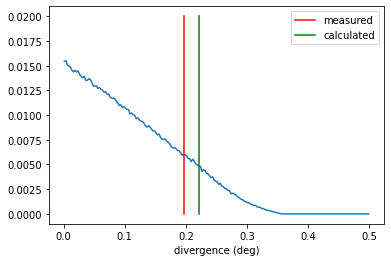

[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475] [3.37176270e-01 2.67279181e-01 1.83880816e-01 1.12322507e-01
 6.24067944e-02 2.82220280e-02 8.61228544e-03 1.00118325e-04
 0.00000000e+00 0.00000000e+00]
Horizontal angle calculated:  0.18214504581220795 ± 0.012890901206046485


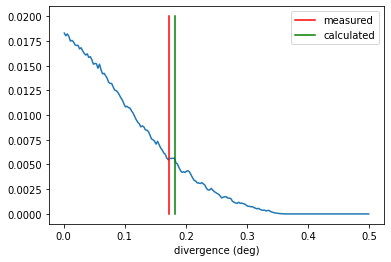

rebin  [0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475]
Position 2 with
Vertical: 0.4247303549628262
Percentage: 0.17561118752279864
limit point: -0.35875
LDv = 0.18189075249718356
Horizontal: 0.31422087459240944
Percentage: 0.20121273496438266
limit point: -0.35875
LDh = 0.1527883832038498
[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475] [2.91214754e-01 2.44090323e-01 1.93787215e-01 1.39486417e-01
 8.48196625e-02 3.73444387e-02 9.16245308e-03 9.47375385e-05
 0.00000000e+00 0.00000000e+00]
Vertical angle calculated:  0.2107288965580731 ± 0.016782944018823576


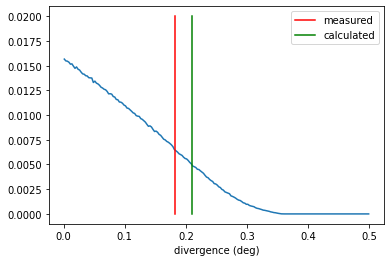

[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475] [3.55589930e-01 2.72325097e-01 1.80406245e-01 1.07262015e-01
 5.47129635e-02 2.32683222e-02 6.34267228e-03 9.27553347e-05
 0.00000000e+00 0.00000000e+00]
Horizontal angle calculated:  0.1695959534940806 ± 0.011148757443380198


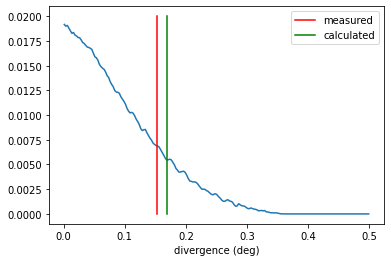

rebin  [0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475]
Position 3 with
Vertical: 0.44188544646413047
Percentage: 0.19945229437594905
limit point: -0.35625
LDv = 0.16802233216643697
Horizontal: 0.36764443203020186
Percentage: 0.22333227963020372
limit point: -0.35875
LDh = 0.1367438442180742
[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475] [2.99905643e-01 2.51061024e-01 1.98527875e-01 1.33913961e-01
 7.75889772e-02 3.22033422e-02 6.75391722e-03 4.52598441e-05
 0.00000000e+00 0.00000000e+00]
Vertical angle calculated:  0.1994837442546875 ± 0.014873528209604614


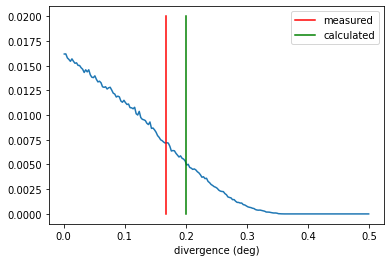

[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475] [3.75581812e-01 2.78050913e-01 1.78413868e-01 1.00142299e-01
 4.62824033e-02 1.77261125e-02 3.76958144e-03 3.30112367e-05
 0.00000000e+00 0.00000000e+00]
Horizontal angle calculated:  0.15539523916100503 ± 0.009284462072677467


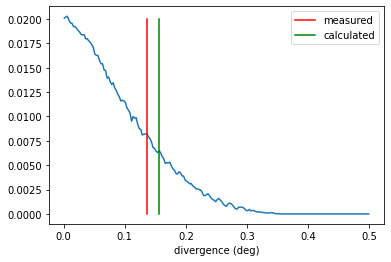

rebin  [0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475]
Position 4 with
Vertical: 0.5081967678874055
Percentage: 0.250761088256815
limit point: -0.35625
LDv = 0.14395894207200274
Horizontal: 0.3800552002502139
Percentage: 0.2680928151744562
limit point: -0.31625
LDh = 0.11765030592592854
[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475] [3.11282188e-01 2.58607713e-01 1.99321264e-01 1.29105185e-01
 7.15797814e-02 2.58293489e-02 4.25093110e-03 2.35889009e-05
 0.00000000e+00 0.00000000e+00]
Vertical angle calculated:  0.1874182710839218 ± 0.012974871324316645


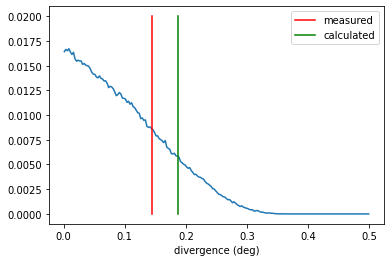

[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475] [0.3964391  0.28559137 0.17545677 0.09220269 0.03845424 0.01074993
 0.00110589 0.         0.         0.        ]
Horizontal angle calculated:  0.139999981155427 ± 0.007406350293117198


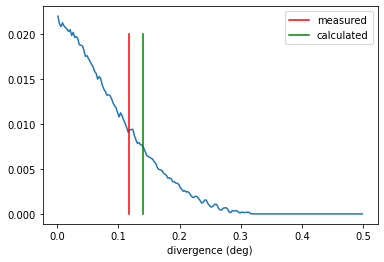

rebin  [0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475]
Position 2 without
Vertical: 0.34445280916936977
Percentage: 0.16876724820014918
limit point: -0.6475
LDv = 0.3311857884153844
Horizontal: 0.7689405070155705
Percentage: 0.493252707125908
limit point: -0.5725
LDh = 0.1807431844090282
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95] [0.32525816 0.27068875 0.19704206 0.10771682 0.05255899 0.04210189
 0.00463333 0.         0.         0.        ]
Vertical angle calculated:  0.7732515517577683 ± 0.3599034367797859


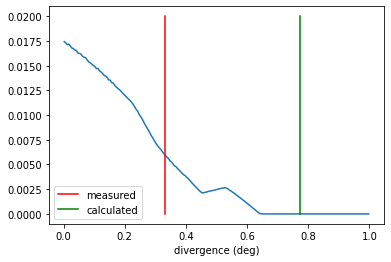

[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95] [0.32529921 0.28438881 0.19260319 0.11248623 0.06705532 0.01816723
 0.         0.         0.         0.        ]
Horizontal angle calculated:  0.6608612131394549 ± 0.2449793960434989


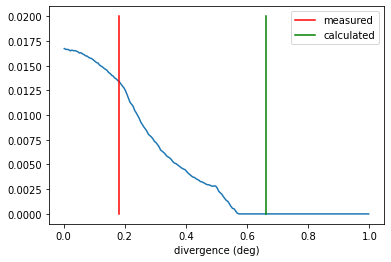

rebin  [0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
Position 3 without
Vertical: 0.33745833683848
Percentage: 0.1508139490730106
limit point: -0.58275
LDv = 0.3063916222707099
Horizontal: 0.8101123916369963
Percentage: 0.5051591641352026
limit point: -0.49175
LDh = 0.1544356893722812
[0.035 0.105 0.175 0.245 0.315 0.385 0.455 0.525 0.595 0.665] [0.25549851 0.22339847 0.18773638 0.14315501 0.08581818 0.0466743
 0.03272486 0.02361014 0.00138414 0.        ]
Vertical angle calculated:  0.5867379143639752 ± 0.1884973235642963


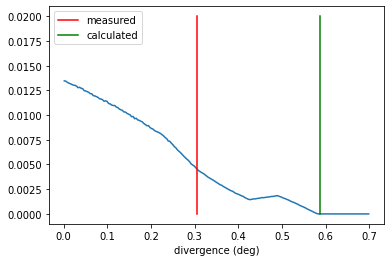

[0.035 0.105 0.175 0.245 0.315 0.385 0.455 0.525 0.595 0.665] [2.59291534e-01 2.42195947e-01 2.03886794e-01 1.35175550e-01
 8.47081101e-02 5.12138221e-02 2.35281897e-02 5.34662670e-08
 0.00000000e+00 0.00000000e+00]
Horizontal angle calculated:  0.46135011894996447 ± 0.10406102237244284


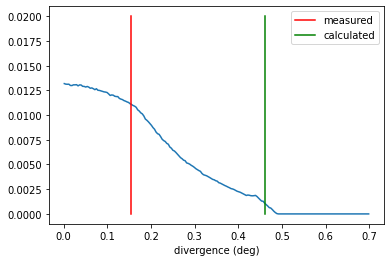

rebin  [0.035 0.105 0.175 0.245 0.315 0.385 0.455 0.525 0.595 0.665]
Position 4 without
Vertical: 0.39868801471927867
Percentage: 0.16074517261615787
limit point: -0.49875
LDv = 0.26899229369648114
Horizontal: 0.8395103012582895
Percentage: 0.5115835404735538
limit point: -0.42875
LDh = 0.13609423220548203
[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475] [0.20306898 0.1834203  0.16245739 0.13985716 0.11505707 0.07984954
 0.04790129 0.02648019 0.02234111 0.01956698]
Vertical angle calculated:  0.45233123055324775 ± 0.10137363212620205


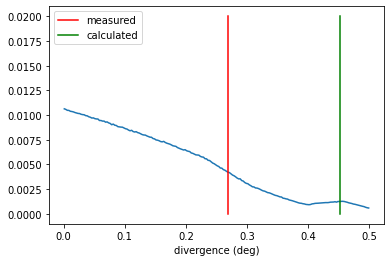

[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475] [0.20711173 0.19952376 0.18596146 0.15163204 0.10682771 0.07099419
 0.04554452 0.02711578 0.0052888  0.        ]
Horizontal angle calculated:  0.34764265619478874 ± 0.052567635458375825


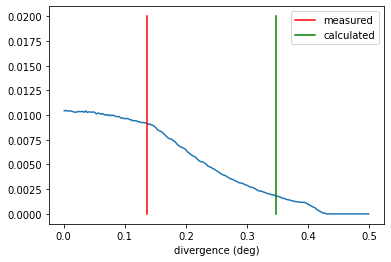

rebin  [0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475]
Siemens 3.0206064854677397 Gd 3.223808255325842


In [465]:
calcV,calcH = [],[]
print("Position 1 with")
folder = "BOA_20211128_100509" #Position 1 with
LDv = 291
LDverr = 8
LDh = 332
LDherr = 10
v,h,eV1w,eH1w = threshold(folder,LDv,LDh,LDverr,LDherr,5360)
calcV.append(v)
calcH.append(h)
print("Position 2 with")
folder = "BOA_20211128_104840" #Position 2 with
LDv = 315
LDverr = 15
LDh = 375
LDherr = 13
v,h,eV2w,eH2w = threshold(folder,LDv,LDh,LDverr,LDherr,6360)
calcV.append(v)
calcH.append(h)
print("Position 3 with")
folder = "BOA_20211127_223433" #Position 3 with
LDv = 341
LDverr = 11
LDh = 419
LDherr = 16
v,h,eV3w,eH3w = threshold(folder,LDv,LDh,LDverr,LDherr,7360)
calcV.append(v)
calcH.append(h)
print("Position 4 with")
folder = "BOA_20211128_133840" #Position 4 with
LDv = 398
LDverr = 15
LDh = 487
LDherr = 24
v,h,eV4w,eH4w = threshold(folder,LDv,LDh,LDverr,LDherr,8360)
calcV.append(v)
calcH.append(h)
print("Position 2 without")
folder = "BOA_20211129_124640" #Position 2 without
LDv = 173
LDverr = 3
LDh = 317
LDherr = 9
v,h,eV2o,eH2o = threshold(folder,LDv,LDh,LDverr,LDherr,6360)
calcV.append(v)
calcH.append(h)
print("Position 3 without")
folder = "BOA_20211129_133217" #Position 3 without
LDv = 187
LDverr = 3
LDh = 371
LDherr = 13
v,h,eV3o,eH3o = threshold(folder,LDv,LDh,LDverr,LDherr,7360)
calcV.append(v)
calcH.append(h)
print("Position 4 without")
folder = "BOA_20211128_141924" #Position 4 without
LDv = 213
LDverr = 4
LDh = 421
LDherr = 17
v,h,eV4o,eH4o = threshold(folder,LDv,LDh,LDverr,LDherr,8360)
calcV.append(v)
calcH.append(h)

array_meas = [0.2,0.182,0.168,0.144,0.331,0.306,0.269,0.17,0.153,0.137,0.117,0.181,0.154,0.136]
array_siem = [0.195,0.1891,0.1763,0.1637,0.3148,0.2938,0.264,0.18,0.1632,0.1481,0.1374,0.1904,0.169,0.1536]

chiSiemens,chiGd,k = 0,0,0
for i in range(len(calcV)):
    chiSiemens += (array_siem[i]-calcV[i])**2/array_siem[i]
    chiGd +=(array_meas[i]-calcV[i])**2/array_meas[i]
    k+=1
for i in range(len(calcH)):
    chiSiemens += (array_siem[i+k]-calcH[i])**2/array_siem[i+k]
    chiGd +=(array_meas[i+k]-calcH[i])**2/array_meas[i+k]
print("Siemens",chiSiemens,"Gd",chiGd)
calculated = np.zeros(14)
for i in range(7):
    calculated[i] = calcV[i]
    calculated[i+7] = calcH[i]
    

Vertical: 0.3768233275972607
Percentage: 0.11454212997258523
limit point: -0.49875
LDv = 0.26899229369648114
Horizontal: 0.38115279032945354
Percentage: 0.23117021843153057
limit point: -0.25625
LDh = 0.13609423220548203


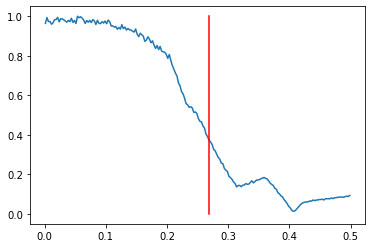

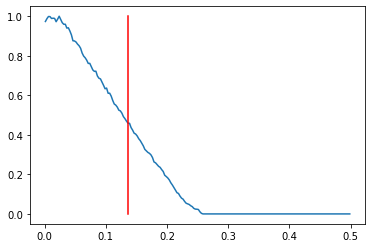

Theta angle:  0.26899229369648114
Percentage vertical:  11.749028713127021 12.512346285843227 11.034013107008786
Theta angle:  0.13609423220548203
Percentage horizontal:  10.130127047558226 11.081494112947867 8.776209461956318


In [307]:
title3X = folder+"/linear_monitor_divergence2.dat"
title4X = folder+"/linear_monitor_divergence4.dat"
title3Y = folder+"/linear_monitor_divergence2Y.dat"
title4Y = folder+"/linear_monitor_divergence4Y.dat"

content3X = np.loadtxt(title3X,dtype=float,unpack=True)
content4X = np.loadtxt(title4X,dtype=float,unpack=True)
content3Y = np.loadtxt(title3Y,dtype=float,unpack=True)
content4Y = np.loadtxt(title4Y,dtype=float,unpack=True)
triangle = []
i=0

thetaV = np.arctan(1/LDv)*360/(2*math.pi)
thetaVmin = np.arctan(1/(LDv+LDverr))*360/(2*math.pi)
thetaVmax = np.arctan(1/(LDv-LDverr))*360/(2*math.pi)

thetaH = np.arctan(1/LDh)*360/(2*math.pi)
thetaHmin = np.arctan(1/(LDh+LDherr))*360/(2*math.pi)
thetaHmax = np.arctan(1/(LDh-LDherr))*360/(2*math.pi)

for element in content3X[0]:
    if -0.36 < element < 0:
        triangle.append(1 + content3X[0][i]/0.36)
    elif 0 < element < 0.36:
        triangle.append(1 + content3X[0][i]/(-0.36))
    else:
        triangle.append(0)
    i+=1

convergence = []
for i in range(len(triangle)):
    convergence.append(triangle[i]*content3X[1][i])

convergenceY = []
for i in range(len(triangle)):
    convergenceY.append(triangle[i]*content3Y[1][i])

print("Vertical:",np.interp(thetaV, content4Y[0], content4Y[1]/np.max(content4Y[1])))
j=0
while(content4Y[0][j] < -thetaV):
    j+=1
print("Percentage: "+str((2*sum(content4Y[1][:j]))/sum(content4Y[1])))
j=0
while(content4Y[1][j] == 0):
    j+=1
print("limit point:",content4Y[0][j])
print("LDv =",thetaV)
print("===============")

print("Horizontal:",np.interp(thetaH, content4X[0], content4X[1]/np.max(content4X[1])))
j=0
while(content4X[0][j] < -thetaH):
    j+=1
print("Percentage: "+str((2*sum(content4X[1][:j]))/sum(content4X[1])))
j=0
while(content4X[1][j] == 0):
    j+=1
print("limit point:",content4X[0][j])
print("LDh =",thetaH)

contentfull = []
for i in range(int(len(content4Y[0])/2)):
    contentfull.append(content4Y[1][i]+content4Y[1][-i])
plot_X = content4Y[0][int(len(content4Y[0])/2):]
plt.plot(plot_X,contentfull[::-1]/np.max(contentfull))
plt.plot([thetaV,thetaV],[0,1],color="red")
plt.show()
plt.close() 
contentfullreverse = contentfull[::-1]/np.max(contentfull)
percentage,percentagemin,percentagemax,j=0,0,0,1

while plot_X[-j]>thetaV:
    percentage += contentfullreverse[-j]
    j+=1
j=1
while plot_X[-j]>thetaVmin:
    percentagemin += contentfullreverse[-j]
    j+=1
j=1
while plot_X[-j]>thetaVmax:
    percentagemax += contentfullreverse[-j]
    j+=1


contentfull = []
for i in range(int(len(content4X[0])/2)):
    contentfull.append(content4X[1][i]+content4X[1][-i])
plot_X = content4X[0][int(len(content4X[0])/2):]
plt.plot(plot_X,contentfull[::-1]/np.max(contentfull))
plt.plot([thetaH,thetaH],[0,1],color="red")
plt.show()
plt.close()
contentfullreverse = contentfull[::-1]/np.max(contentfull)
print("Theta angle: ",thetaV)
print("Percentage vertical: ",percentage,percentagemin,percentagemax)

percentage,percentagemin,percentagemax,j=0,0,0,1
print("Theta angle: ",thetaH)
while plot_X[-j]>thetaH:
    percentage += contentfullreverse[-j]
    j+=1
j=1
while plot_X[-j]>thetaHmin:
    percentagemin += contentfullreverse[-j]
    j+=1
j=1
while plot_X[-j]>thetaHmax:
    percentagemax += contentfullreverse[-j]
    j+=1
print("Percentage horizontal: ",percentage,percentagemin,percentagemax)

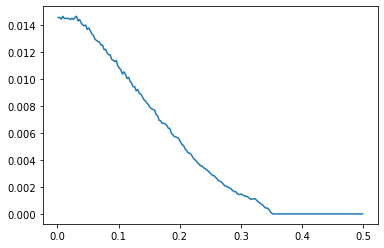

Theta angle:  0.1807431844090282
0.1074045818056751
0.10794789112763507


In [149]:
renorm = 0
epic = contentfull[::-1]/(np.sum(contentfull))

plt.plot(plot_X,epic)
plt.show()
plt.close()
print("Theta angle: ",thetaH)
for i in range(len(plot_X)):
    renorm += plot_X[i]*epic[i]
print(np.sin(renorm))
renorm=0
for i in range(len(content4X[0])):
    renorm+=np.abs(content4X[0][i])*content4X[1][i]/np.sum(content4X[1])
print(renorm)

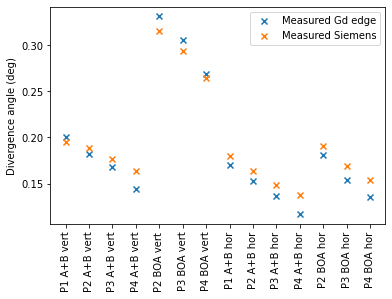

[]


In [22]:
array_calc = [0.22,0.216,0.210,0.204,0.335,0.316,0.297,0.18,0.166,0.153,0.140,0.215,0.187,0.164]
calculated = []
array_points = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
array_meas = [0.2,0.182,0.168,0.144,0.331,0.306,0.269,0.17,0.153,0.137,0.117,0.181,0.154,0.136]
array_siem = [0.195,0.1891,0.1763,0.1637,0.3148,0.2938,0.264,0.18,0.1632,0.1481,0.1374,0.1904,0.169,0.1536]
labels=["P1 A+B vert","P2 A+B vert","P3 A+B vert","P4 A+B vert","P2 BOA vert","P3 BOA vert","P4 BOA vert","P1 A+B hor","P2 A+B hor","P3 A+B hor","P4 A+B hor","P2 BOA hor","P3 BOA hor","P4 BOA hor"]
plt.scatter(array_points,array_meas,label="Measured Gd edge",marker="x")
plt.scatter(array_points,array_siem,label="Measured Siemens",marker="x")
#plt.scatter(array_points,calculated,label="Calculated",marker="+")
plt.xticks(array_points,labels,rotation='vertical')
plt.legend()
plt.ylabel("Divergence angle (deg)")
plt.show()
plt.close()
print(calculated)

In [322]:
def calculate_factors():    
    array_X = [0.0175,0.0525,0.0875,0.12375,0.16,0.195,0.23125,0.2675,0.3025,0.3375,0.37375,0.41,0.445,0.48125]
    array_X = [0.05,0.15,0.25,0.35,0.45]
    array_X = [0.025,0.075,0.125,0.175,0.225,0.275,0.325,0.375,0.425,0.475]
    array_meas = [0.2,0.182,0.168,0.144,0.331,0.306,0.269,0.17,0.153,0.137,0.117,0.181,0.154,0.136]
    array_siem = [0.195,0.1891,0.1763,0.1637,0.3148,0.2938,0.264,0.18,0.1632,0.1481,0.1374,0.1904,0.169,0.1536]
    bins = len(array_X)
    array_meas2 =np.zeros(bins)
    array_siem2 = np.zeros(bins)
    index_array = []
    for j in range(bins):
        index = random.randrange(0,14)
        while index in index_array:
            index = random.randrange(0,14)
        index_array.append(index)
    j=0
    for i in np.sort(index_array):
        array_meas2[j] = array_meas[i]
        array_siem2[j] = array_siem[i]
        j+=1
    averaged = np.zeros(bins)
    for i in range(bins):
        averaged[i] = (array_meas2[i] + array_siem2[i])*0.5
    Meta = np.array([array_X*eV1w,array_X*eV2w,array_X*eV3w,array_X*eV4w,array_X*eV2o,array_X*eV3o,array_X*eV4o,array_X*eH1w,array_X*eH2w,array_X*eH3w,array_X*eH4w,array_X*eH2o,array_X*eH3o,array_X*eH4o])
    A = []
    for i in np.sort(index_array):
        A.append(Meta[i])
    result = np.linalg.solve(A,averaged)
    print(result)
    #plt.plot(array_X,result)
    return result

In [403]:
folder = "BOA_20211129_235153" #Collimator placed at final position with 1e11 neutrons, complete study.
#folder = "BOA_20211028_183158" #Collimator placed at close position with 1e11 neutrons, complete study.

titleX = folder+"/small_Gd_window.dat"

contentX = np.loadtxt(titleX,ndmin=2,max_rows=200,dtype=float)

In [404]:
Image.fromarray(contentX).save("TESTTIF.tif")

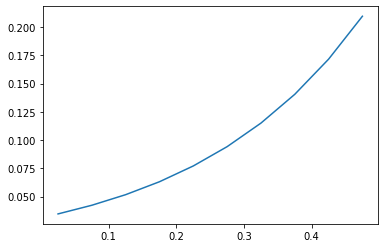

In [459]:
array_X = [0.025,0.075,0.125,0.175,0.225,0.275,0.325,0.375,0.425,0.475]
array_Y = [np.exp(4*i) for i in (array_X)]/sum([np.exp(4*i) for i in (array_X)])

plt.plot(array_X,array_Y)
plt.show()
plt.close()

In [6]:
def calculate (folder,percentage,integral,name,file):
    title4X = folder+"/linear_monitor_divergence4.dat"
    title4Y = folder+"/linear_monitor_divergence4Y.dat"

    content4X = np.loadtxt(title4X,dtype=float,unpack=True)
    content4Y = np.loadtxt(title4Y,dtype=float,unpack=True)
    
    contentfullX = []
    for i in range(int(len(content4X[0])/2)):
        contentfullX.append(content4X[1][i]+content4X[1][-i])
    contentfullreverseX = contentfullX[::-1]/np.sum(contentfullX)
    plot_X = content4X[0][int(len(content4X[0])/2):]
    
    contentfullY = []
    for i in range(int(len(content4Y[0])/2)):
        contentfullY.append(content4Y[1][i]+content4Y[1][-i])
    contentfullreverseY = contentfullY[::-1]/np.sum(contentfullY)
    
    plot_Y = content4Y[0][int(len(content4Y[0])/2):]    
    '''
    plt.plot(plot_X,contentfullreverseX,label="Horizontal")
    plt.plot(plot_Y,contentfullreverseY,label="Vertical")
    plt.legend()
    plt.title(name)
    plt.xlabel("Angle (deg)")
    plt.ylabel("Normalised intensity")
    plt.show()
    plt.savefig(file+".png")
    '''
    
    j=0
    while contentfullreverseX[j] > percentage*np.max(contentfullreverseX) and plot_X[j] < 0.33:
        j+=1
    value_horizontal = plot_X[j]
    j=0
    while contentfullreverseY[j] > percentage*np.max(contentfullreverseY) and plot_Y[j] < 0.33:
        j+=1
    value_vertical = plot_Y[j]
    
    sumGd,sumSiem,j = 0,0,0
    while sumGd < integral:
        sumGd += contentfullreverseX[j]
        j+=1
    integral_horizontal = plot_X[j]
    j=0
    while sumSiem < integral:
        sumSiem += contentfullreverseY[j]
        j+=1
    integral_vertical = plot_Y[j]
    
    averageX = 0
    for i in range(len(contentfullreverseX)):
        averageX += contentfullreverseX[i] * plot_X[i]/sum(contentfullreverseX)
    stdX = 0
    for i in range(len(contentfullreverseX)):
        stdX += (contentfullreverseX[i]/sum(contentfullreverseX))*((plot_X[i]-averageX)**2)
        
    averageY = 0
    for i in range(len(contentfullreverseY)):
        averageY += contentfullreverseY[i] * plot_Y[i]/sum(contentfullreverseY)
        
    stdY = 0
    for i in range(len(contentfullreverseY)):
        stdY += (contentfullreverseY[i]/sum(contentfullreverseY))*((plot_Y[i]-averageY)**2) 
    
    j=0
    while contentfullreverseX[j] > (0.05+percentage)*np.max(contentfullreverseX) and plot_X[j] < 0.33:
        j+=1
    error_horizontal = plot_X[j]
    j=0
    while contentfullreverseY[j] > (0.05+percentage)*np.max(contentfullreverseY) and plot_Y[j] < 0.33:
        j+=1
    error_vertical = plot_Y[j]
        
    
    #print("horizontal,",value_horizontal,"vertical,",value_vertical)
    return [value_horizontal,value_vertical,integral_horizontal,integral_vertical,error_horizontal,error_vertical]

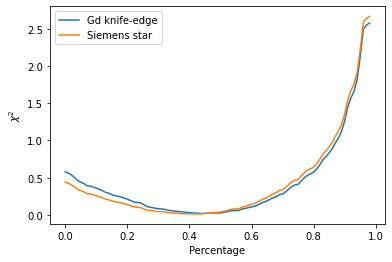

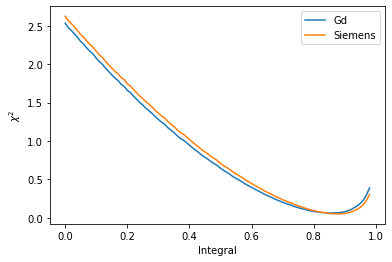

In [51]:
array = ["BOA_20211203_235615","BOA_20211204_113451","BOA_20211204_151501","BOA_20211204_160800","BOA_20211204_182217","BOA_20211205_005536","BOA_20211205_004451"]
name = ["Position 1 ANET+BOA","Position 2 ANET+BOA","Position 3 ANET+BOA","Position 4 ANET+BOA","Position 2 BOA","Position 3 BOA","Position 4 BOA"]
file = ["Position_1_ANET+BOA","Position_2_ANET+BOA","Position_3_ANET+BOA","Position_4_ANET+BOA","Position_2_BOA","Position_3_BOA","Position_4_BOA"]
array_meas = [0.2,0.182,0.168,0.144,0.331,0.306,0.269,0.17,0.153,0.137,0.117,0.181,0.154,0.136]
array_siem = [0.195,0.1891,0.1763,0.1637,0.3148,0.2938,0.264,0.18,0.1632,0.1481,0.1374,0.1904,0.169,0.1536]
chi2m_array = []
chi2s_array = []
chi2m_int = []
chi2s_int = []
bins=100
for k in range(bins-1):
    i,chi2m,chi2s,chi2mint,chi2sint=0,0,0,0,0
    for boa in array:
        elem = calculate(boa,(k+1)/bins,(k+1)/bins,name[i],file[i])
        chi2m += (elem[0]-array_meas[i+7])**2/array_meas[i+7] + (elem[1]-array_meas[i])**2/array_meas[i]
        chi2s += (elem[0]-array_siem[i+7])**2/array_siem[i+7] + (elem[1]-array_siem[i])**2/array_siem[i]
        chi2mint += (elem[2]-array_meas[i+7])**2/array_meas[i+7] + (elem[3]-array_meas[i])**2/array_meas[i]
        chi2sint += (elem[2]-array_siem[i+7])**2/array_siem[i+7] + (elem[3]-array_siem[i])**2/array_siem[i]
        #print(array_meas[i+7],array_meas[i])
        #print(array_siem[i+7],array_siem[i])
        i+=1
    chi2m_array.append(chi2m)
    chi2s_array.append(chi2s)
    chi2m_int.append(chi2mint)
    chi2s_int.append(chi2sint)
plt.plot([k/bins for k in range(bins-1)],chi2m_array,label="Gd knife-edge")
plt.plot([k/bins for k in range(bins-1)],chi2s_array,label="Siemens star")
plt.legend()
plt.xlabel("Percentage")
plt.ylabel("$\chi^2$")
plt.show()
plt.close()
plt.plot([k/bins for k in range(bins-1)],chi2m_int,label="Gd")
plt.plot([k/bins for k in range(bins-1)],chi2s_int,label="Siemens")
plt.legend()
plt.xlabel("Integral")
plt.ylabel("$\chi^2$")
plt.show()
plt.close()

In [30]:
print(chi2m_array.index(np.min(chi2m_array)))
print(chi2s_array.index(np.min(chi2s_array)))
print(chi2m_int.index(np.min(chi2m_int)))
print(chi2s_int.index(np.min(chi2s_int)))

44
43
86
88


[0.19625 0.19375 0.18375 0.18125 0.29125 0.27125 0.25375 0.16375 0.14625
 0.13875 0.12625 0.18125 0.15875 0.14125]


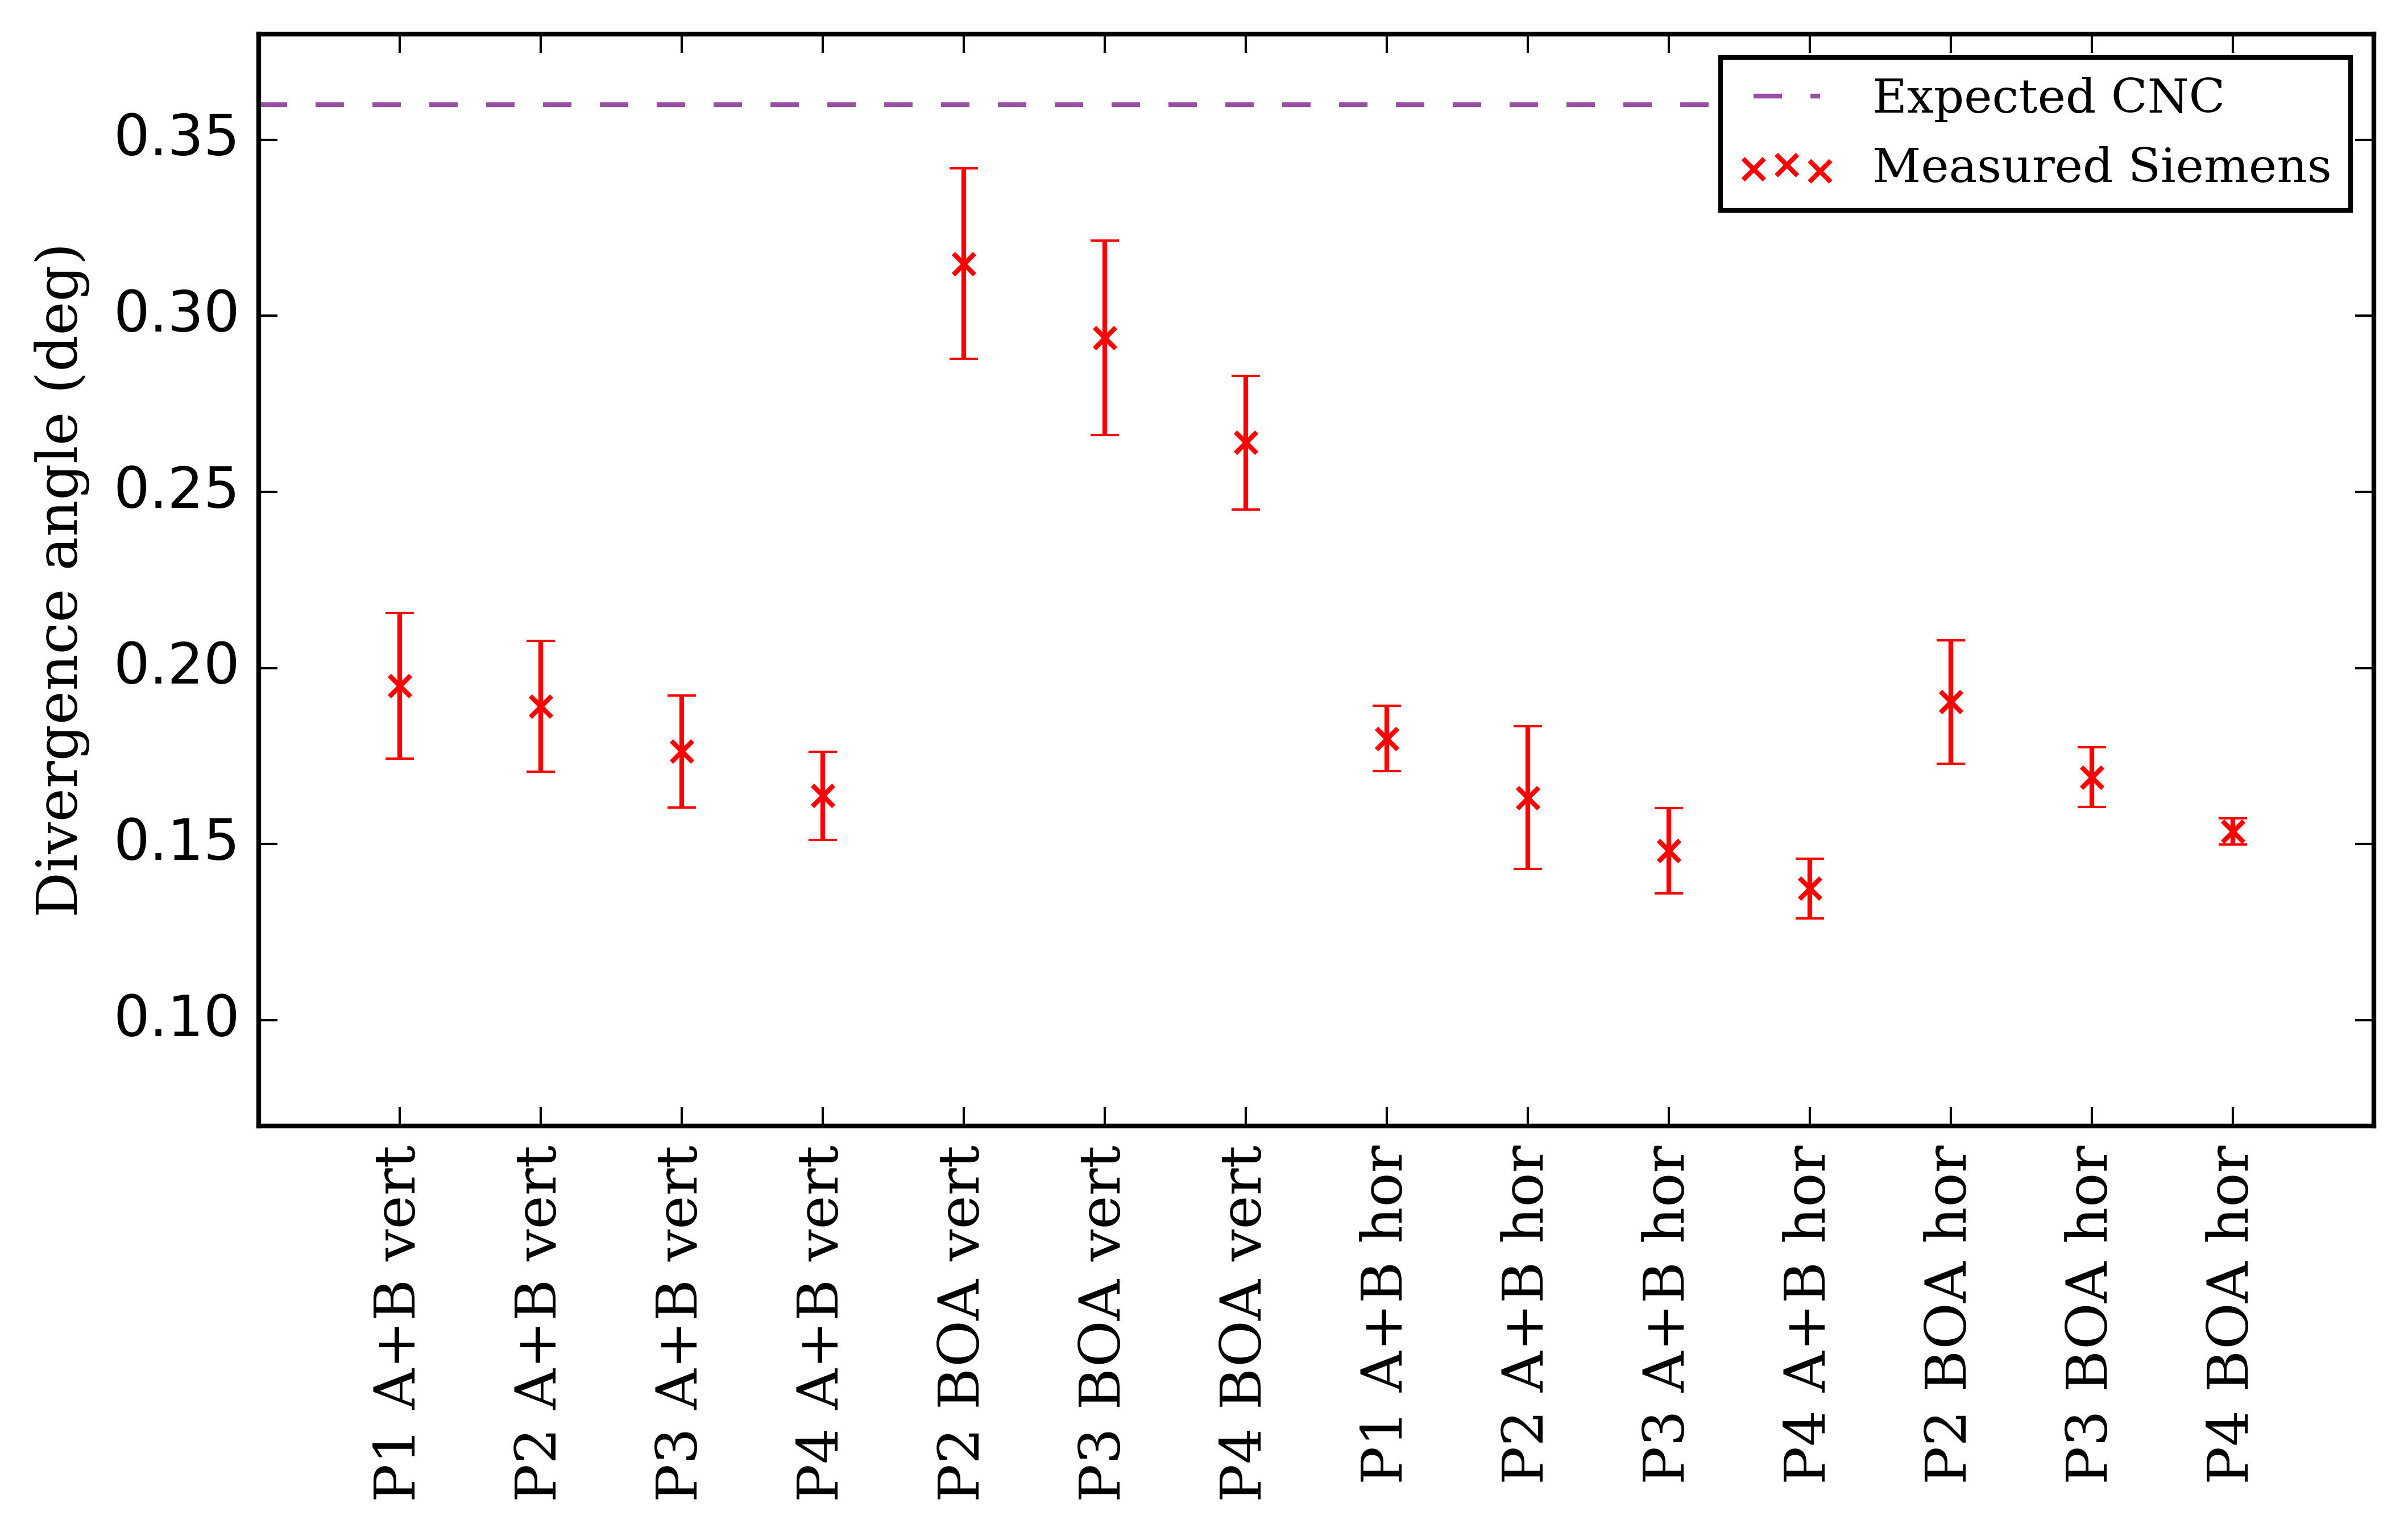

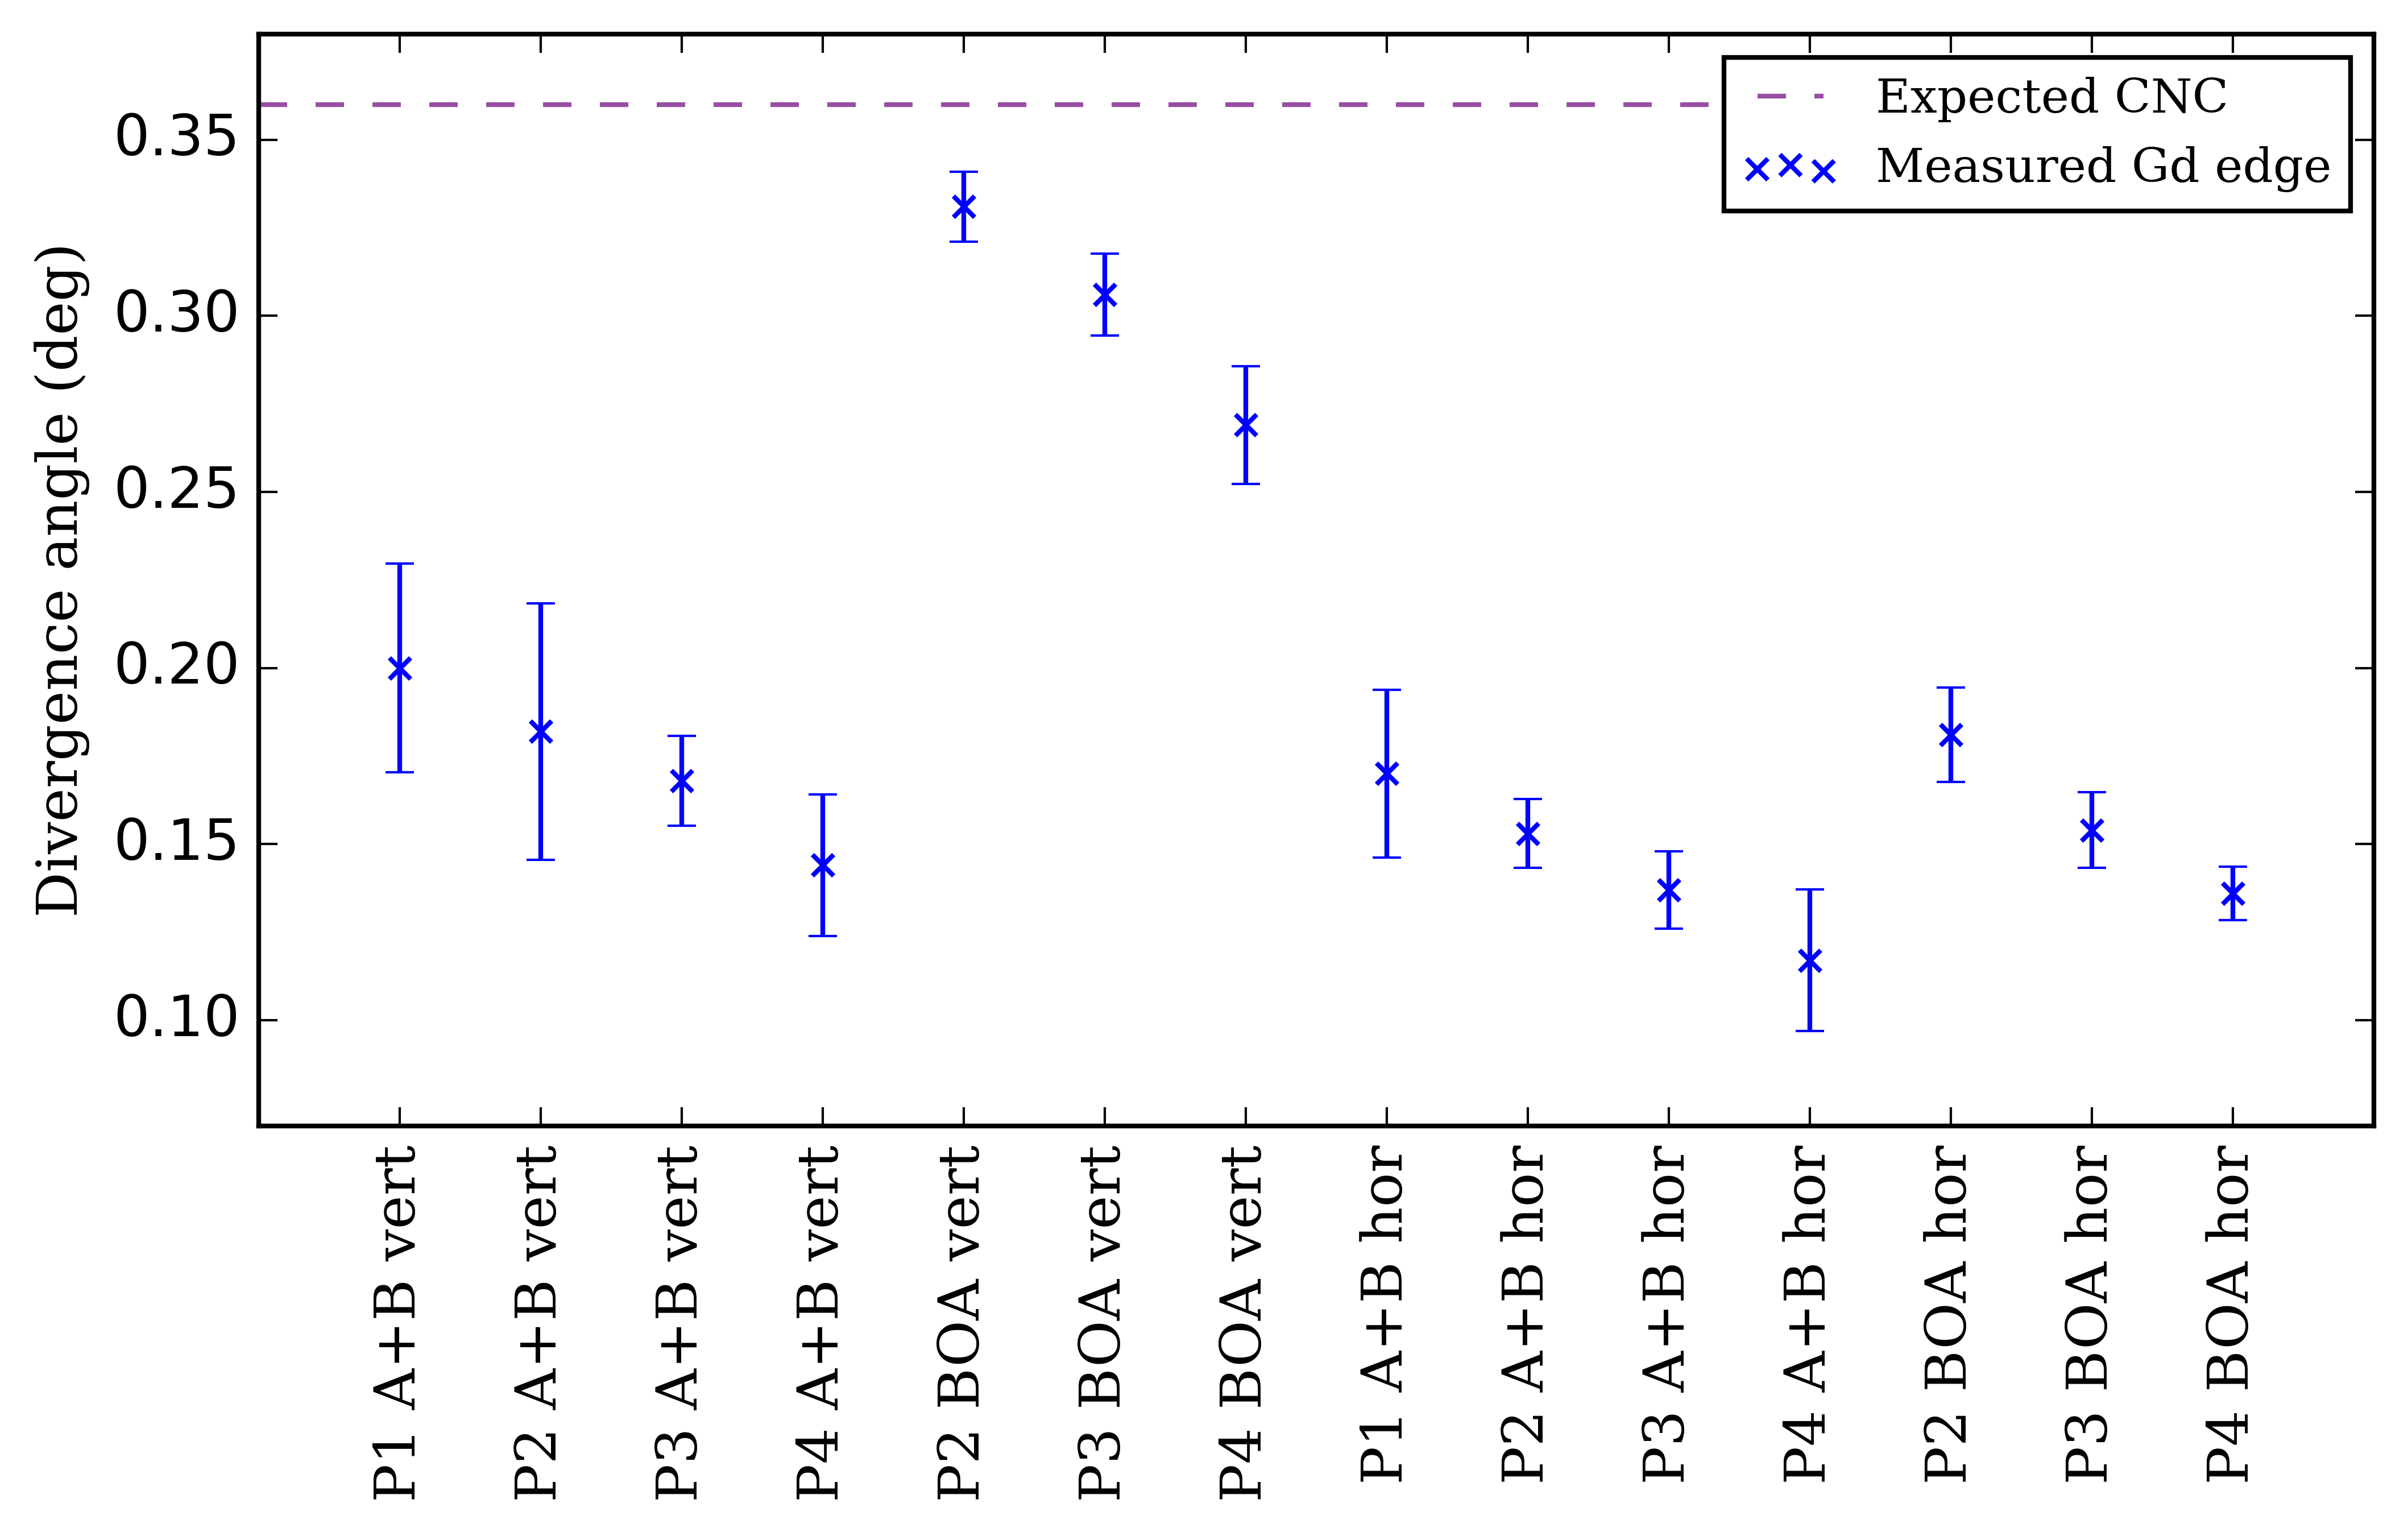

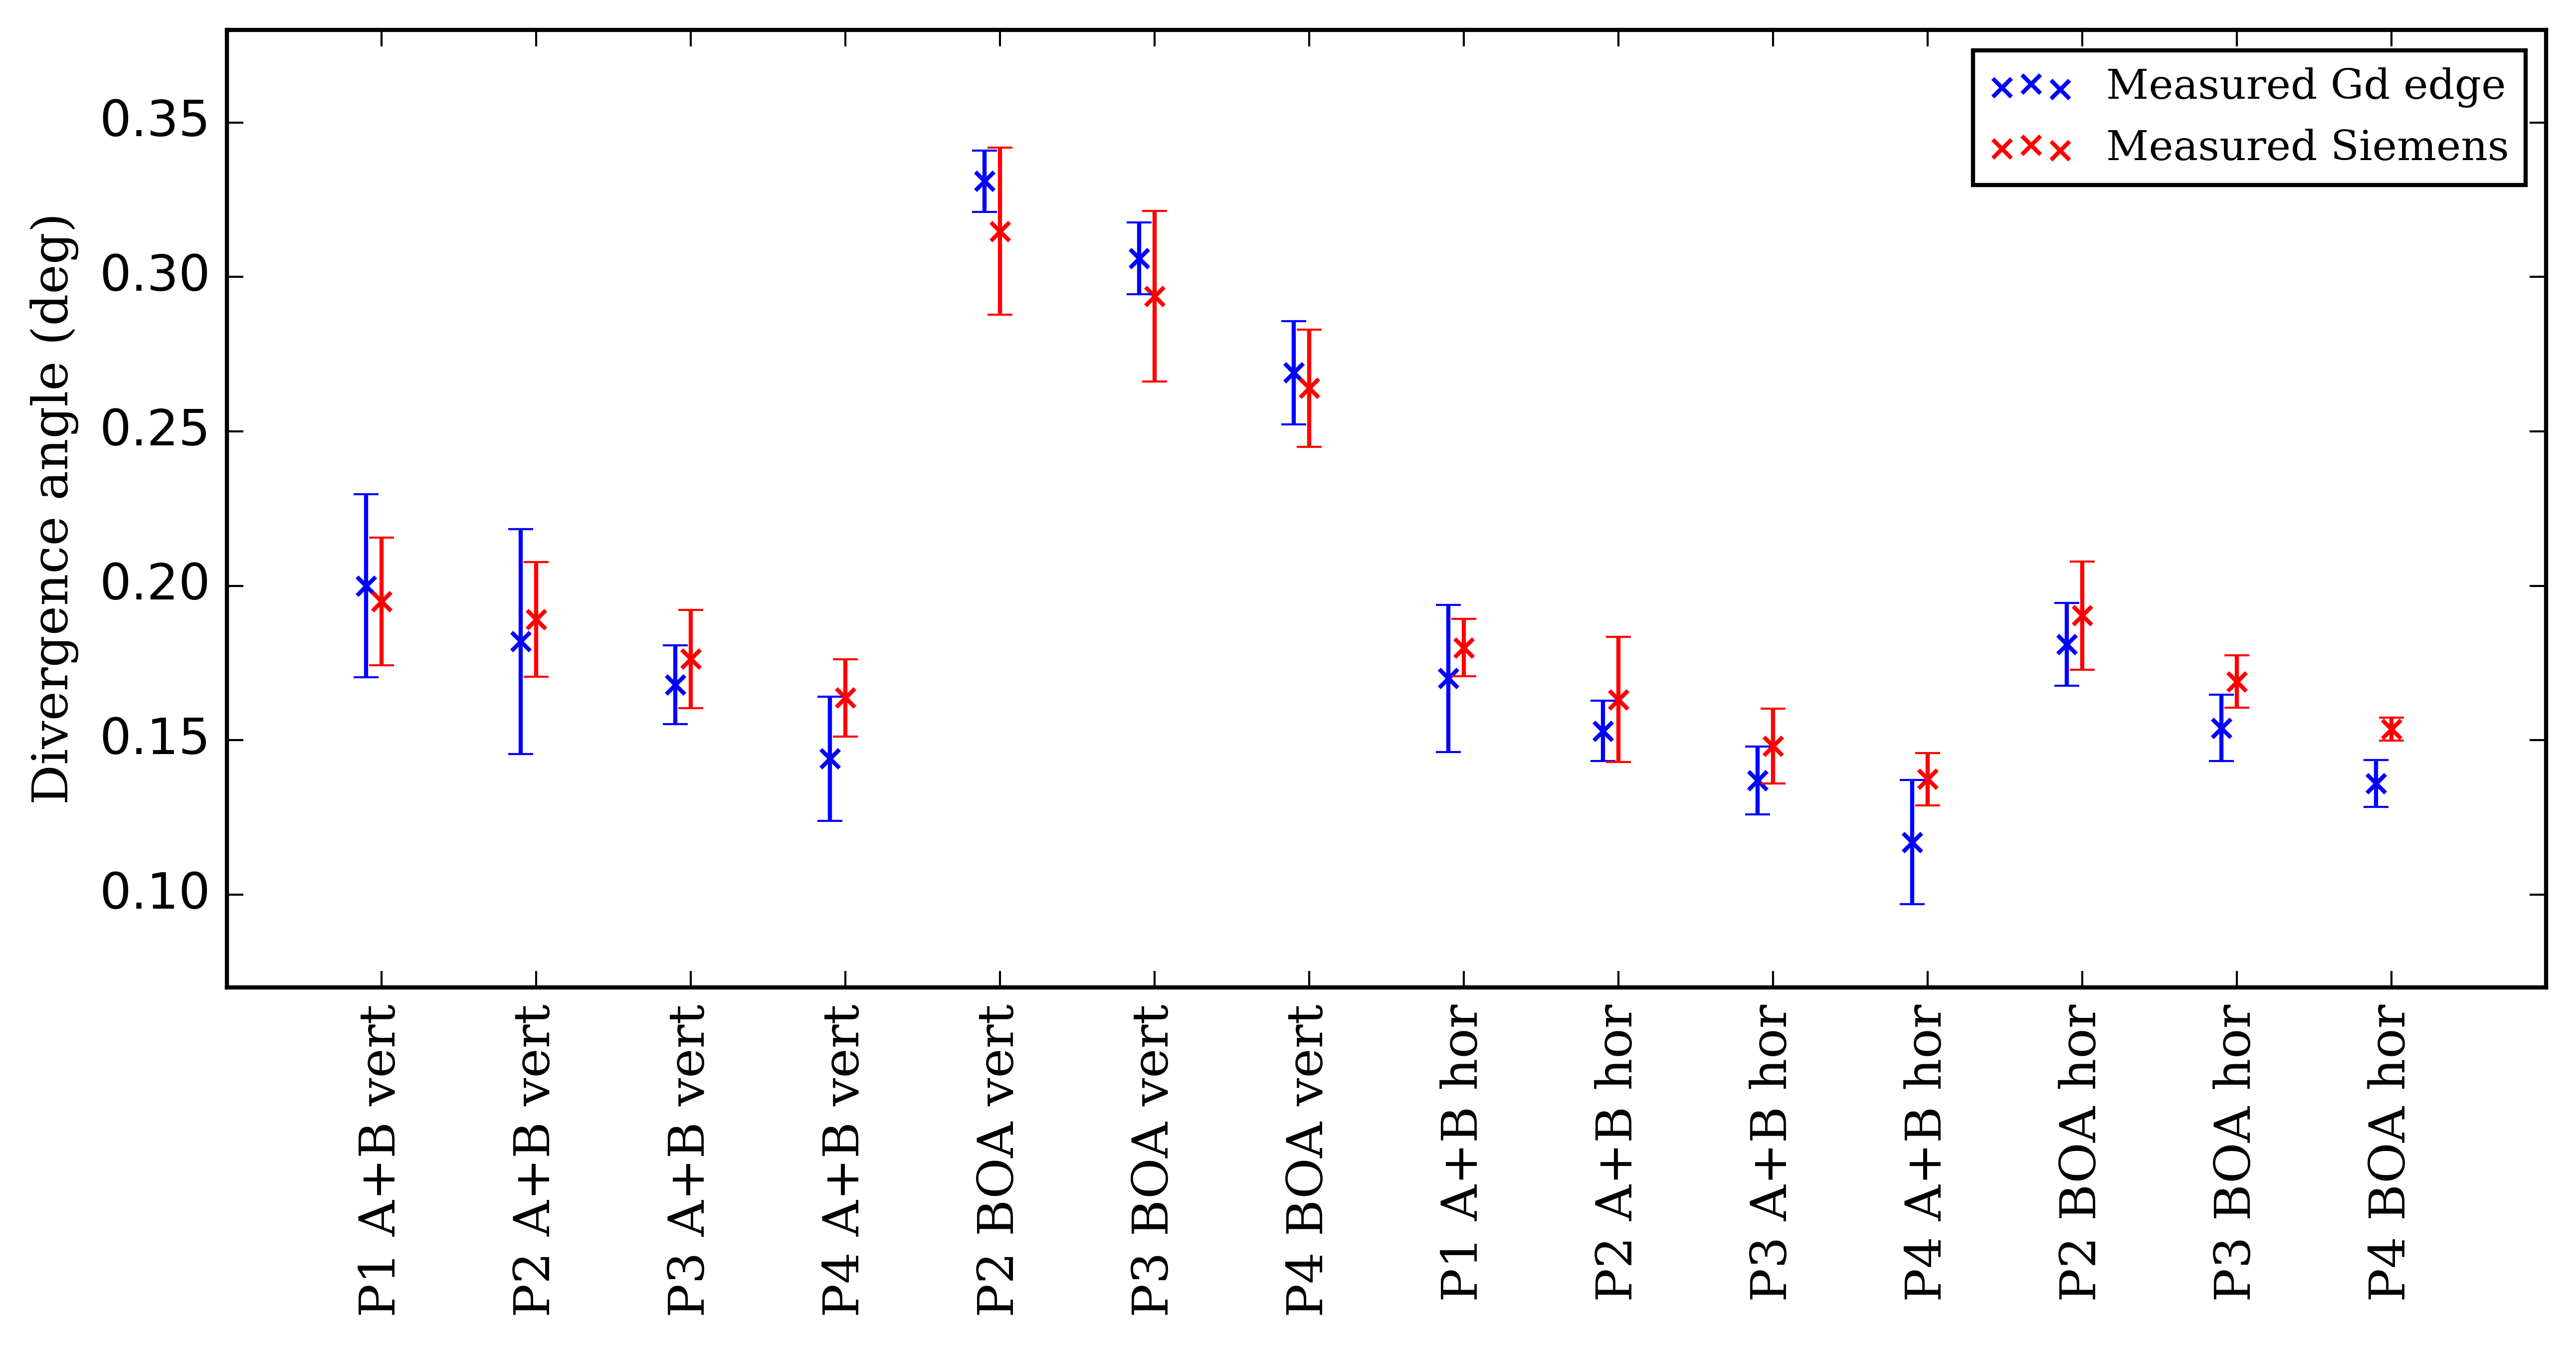

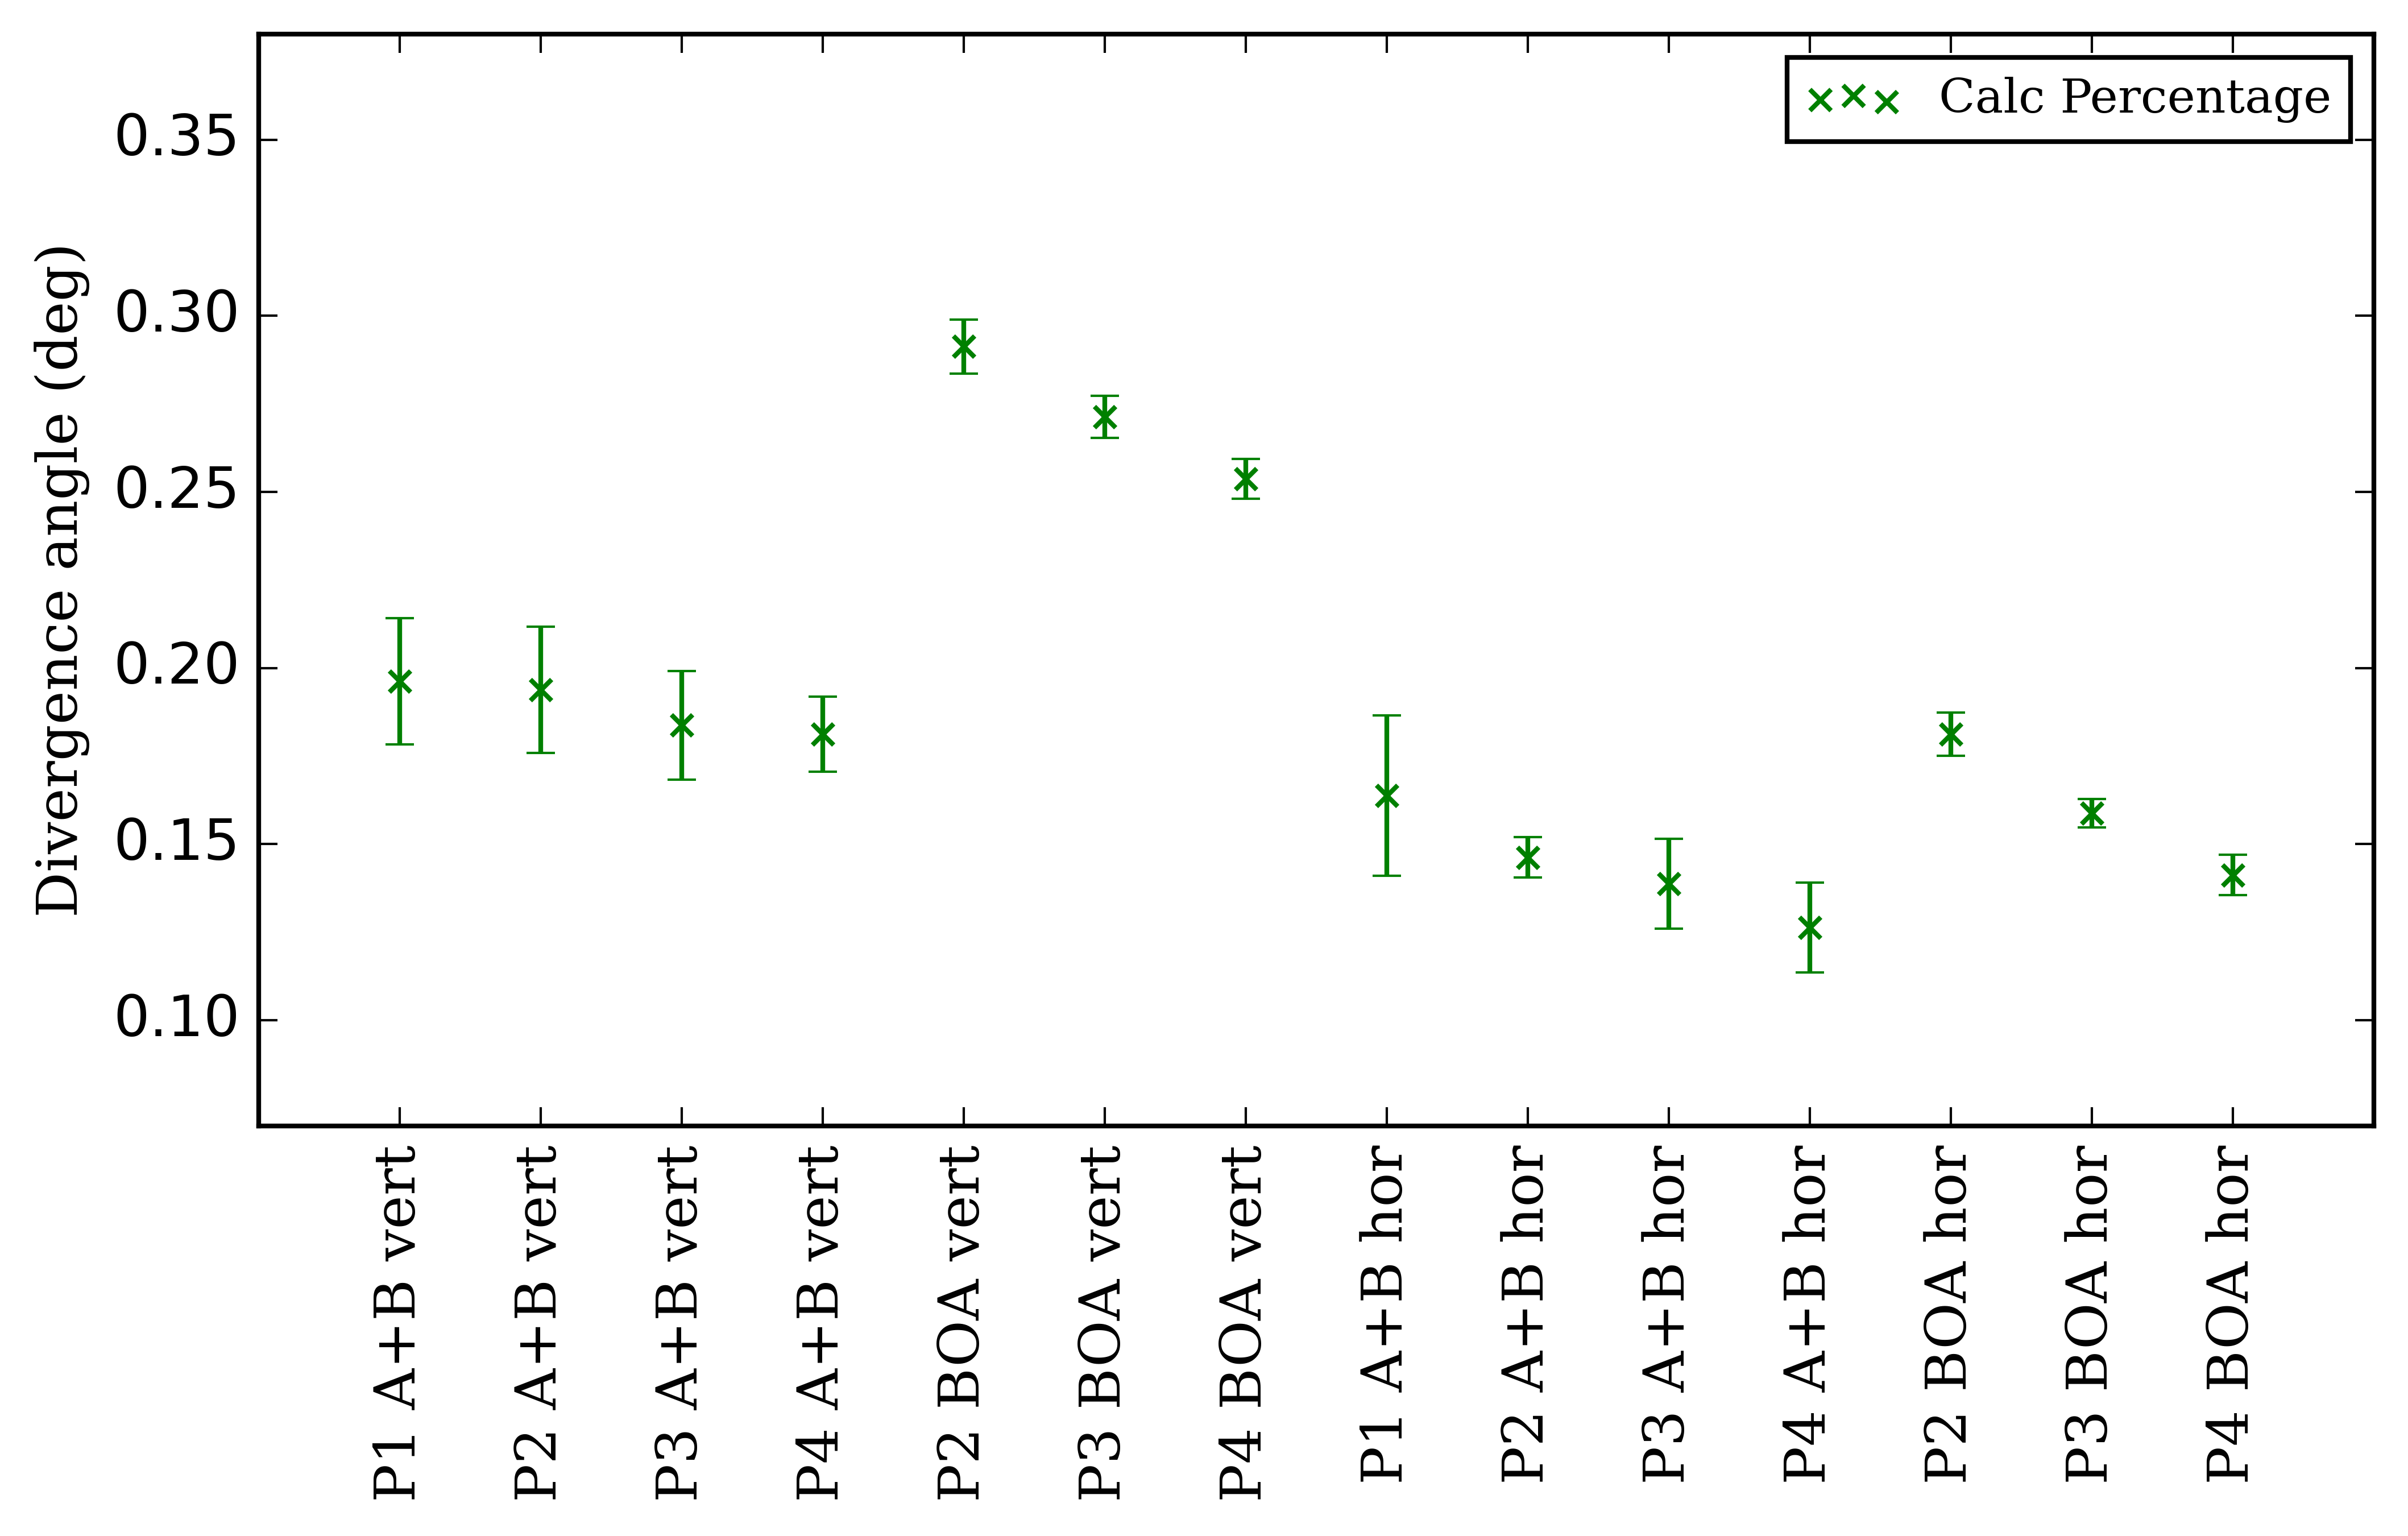

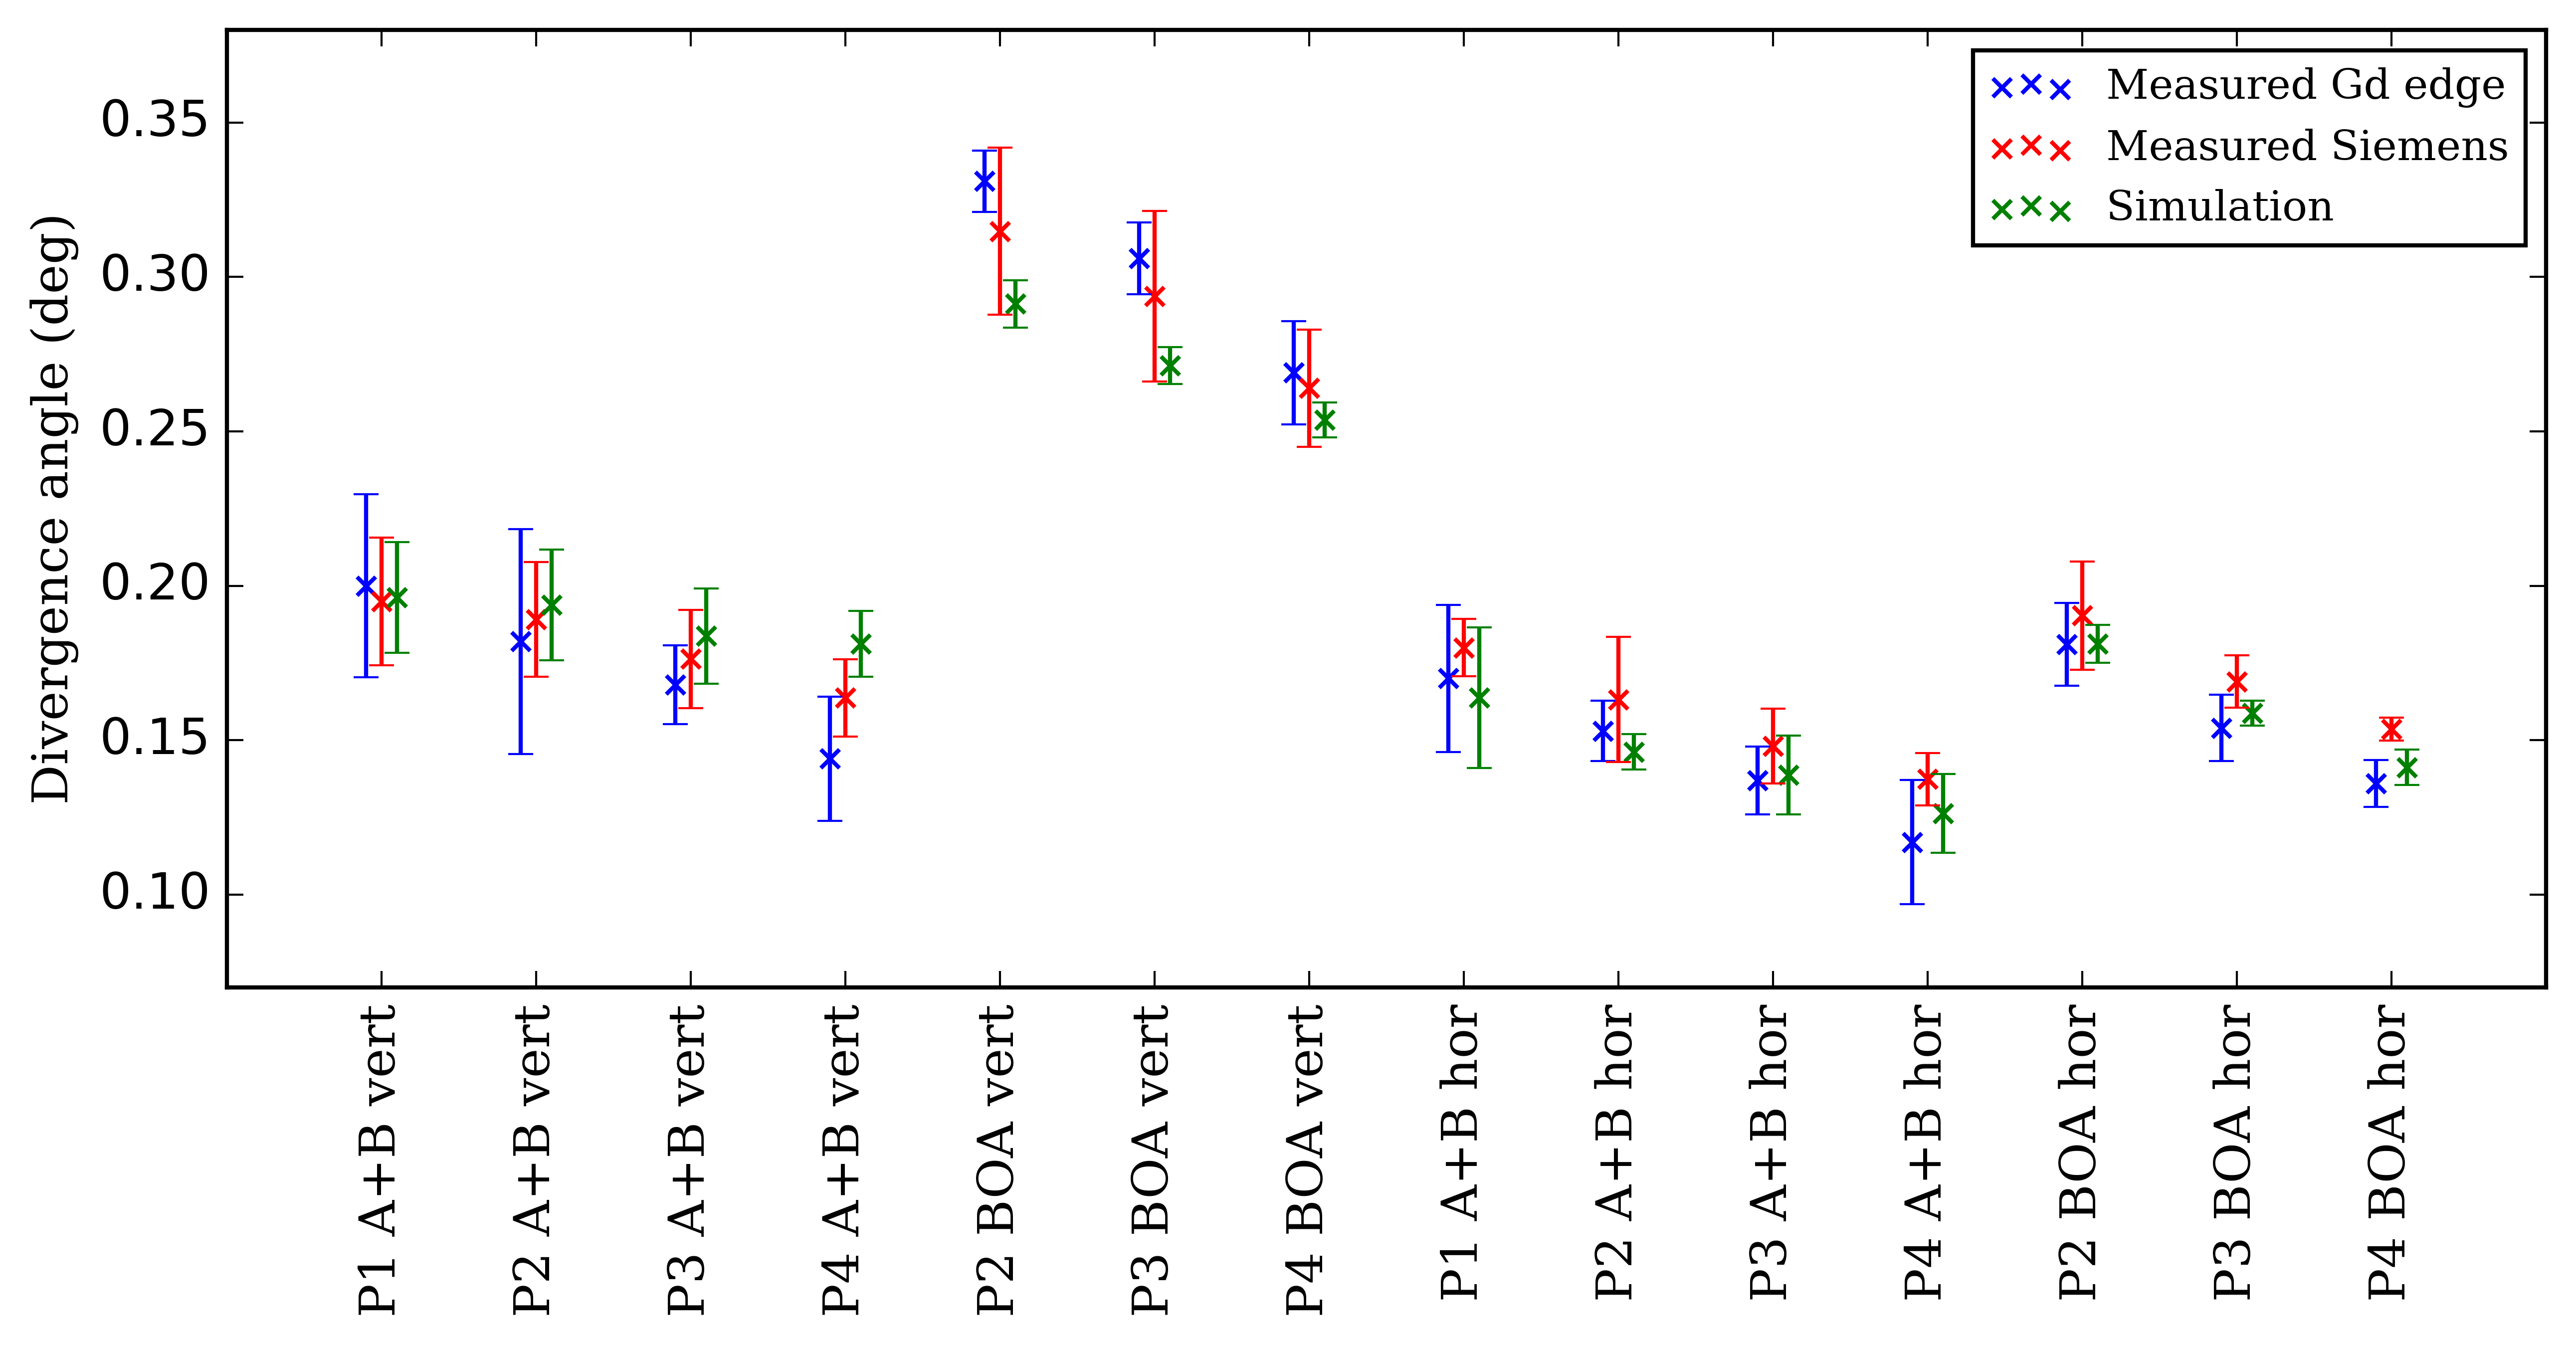

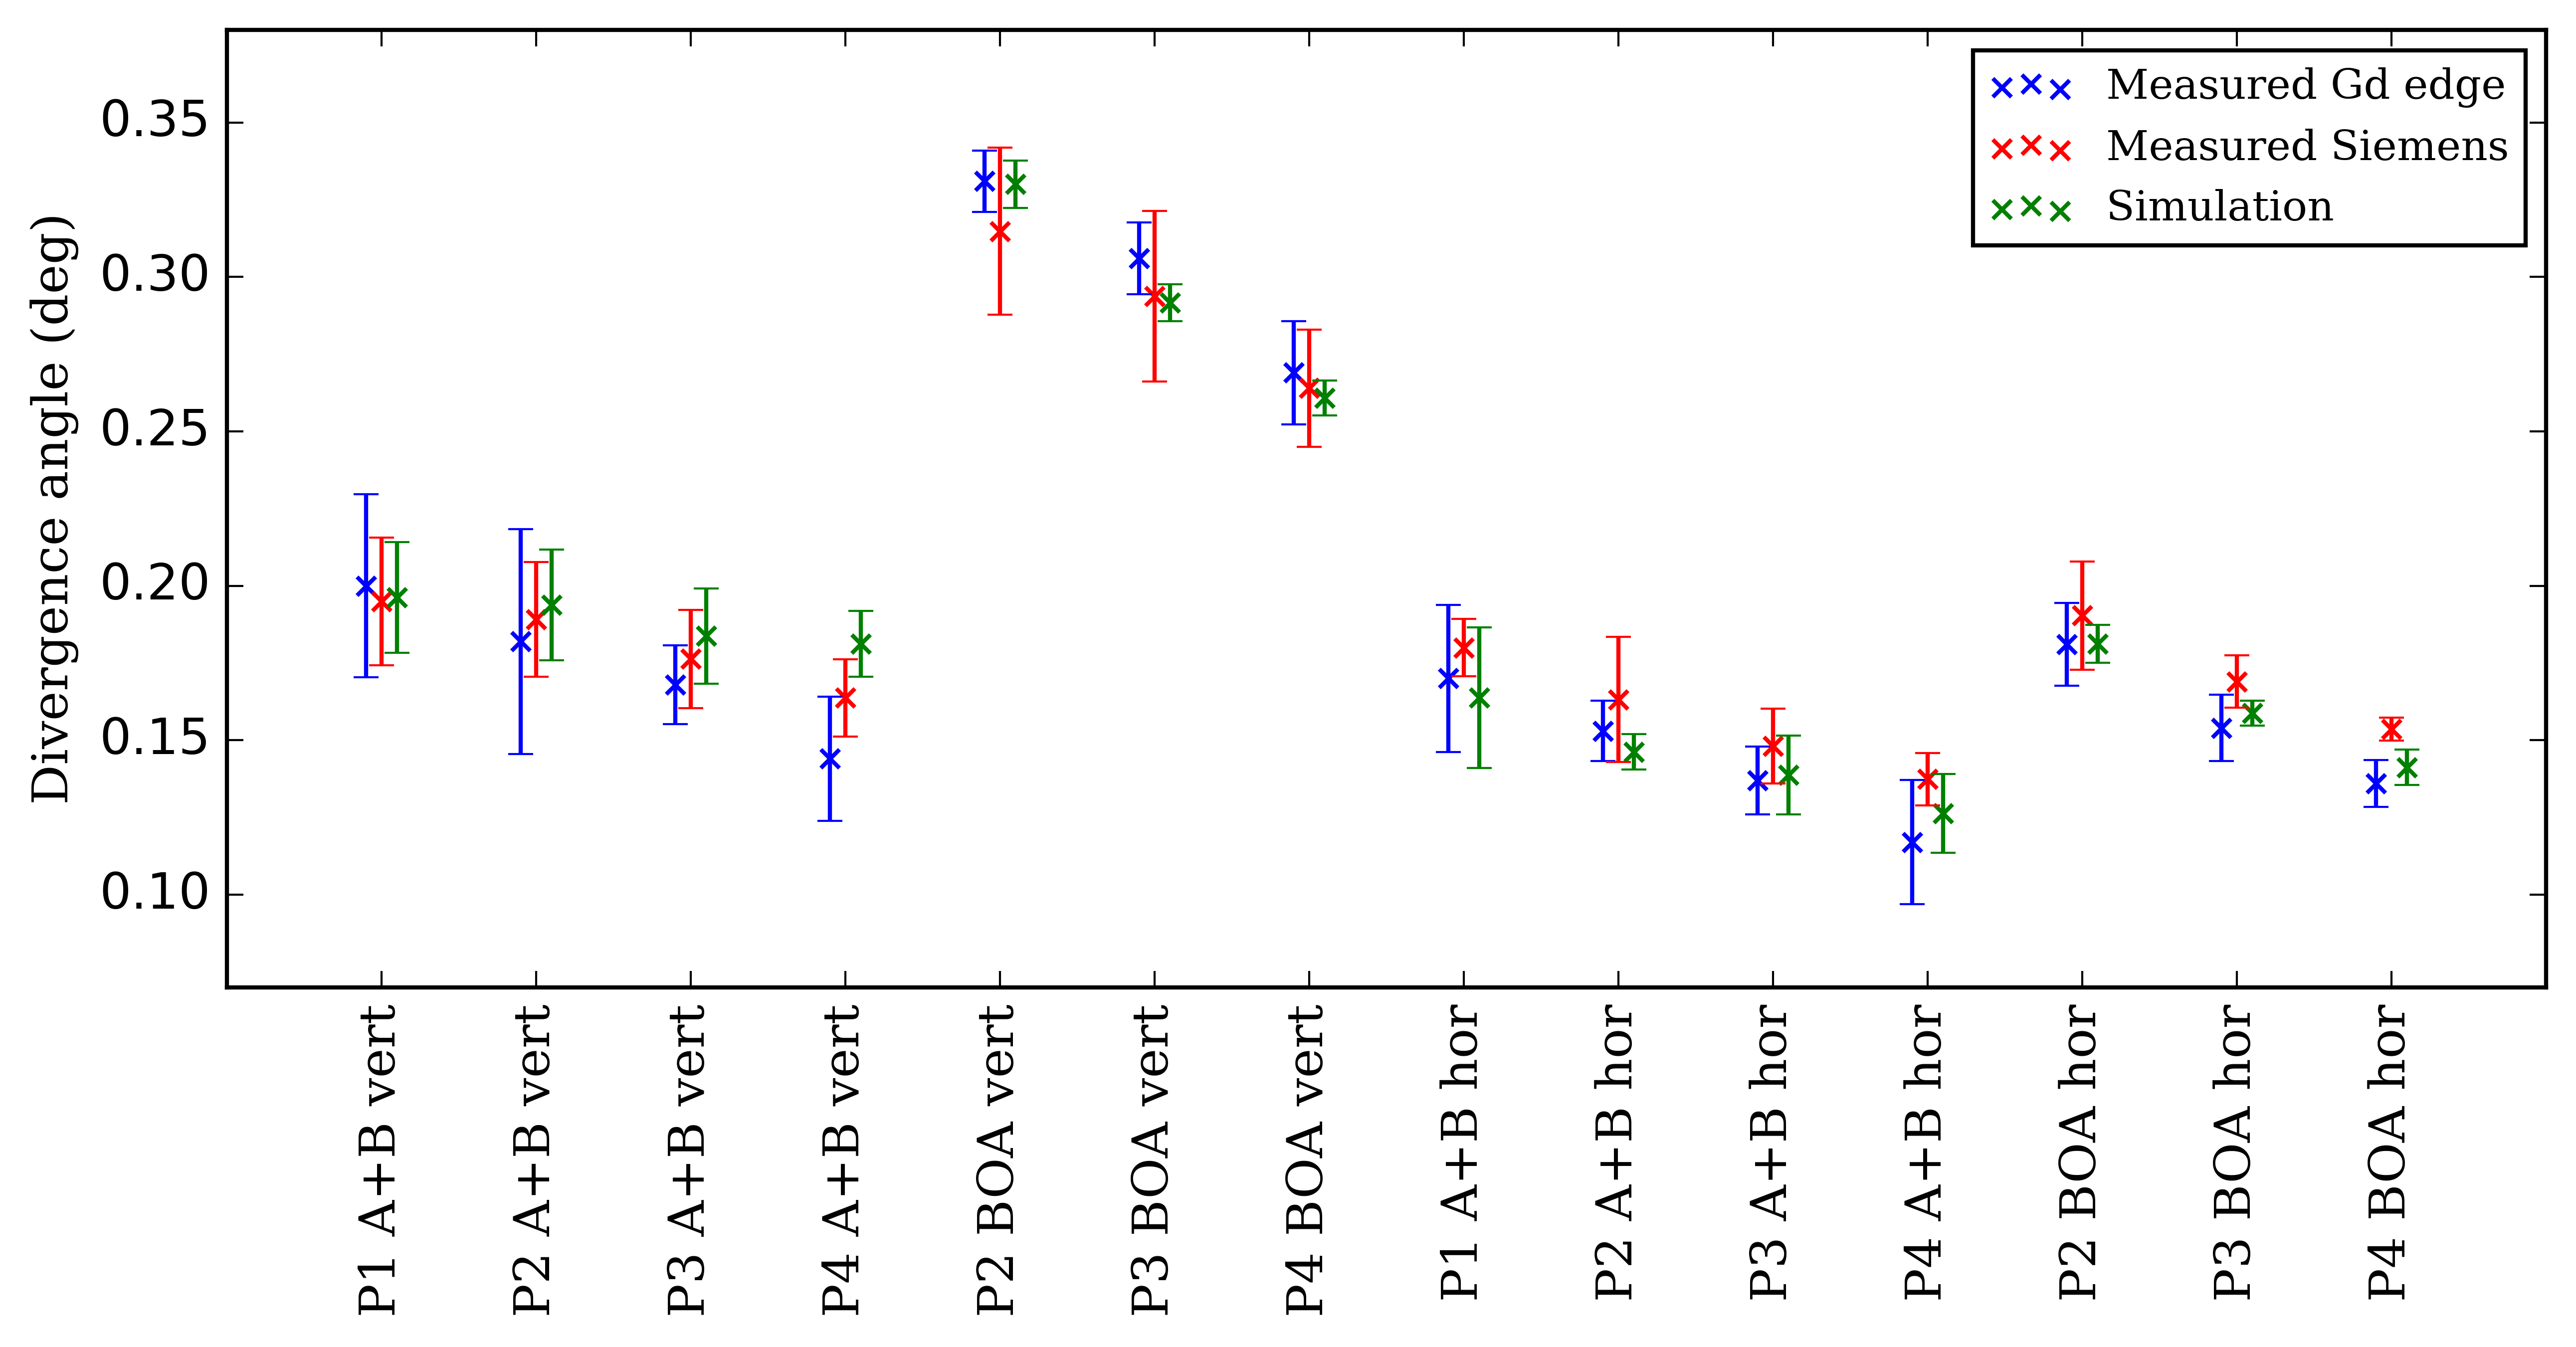

P1 A+B vert 0.19625 0.017500000000000016
P2 A+B vert 0.19375 0.017500000000000016
P3 A+B vert 0.18375 0.014999999999999986
P4 A+B vert 0.18125 0.009999999999999981
P2 BOA vert 0.33 0.04375000000000001
P3 BOA vert 0.29165 0.02290000000000003
P4 BOA vert 0.2608 0.009550000000000003
P1 A+B hor 0.16375 0.02250000000000002
P2 A+B hor 0.14625 0.0050000000000000044
P3 A+B hor 0.13875 0.012500000000000011
P4 A+B hor 0.12625 0.012499999999999997
P2 BOA hor 0.18125 0.0050000000000000044
P3 BOA hor 0.15875 0.0025000000000000022
P4 BOA hor 0.14125 0.004999999999999977


In [61]:
array = ["BOA_20211203_235615","BOA_20211204_113451","BOA_20211204_151501","BOA_20211204_160800","BOA_20211204_182217","BOA_20211205_005536","BOA_20211205_004451"]
array_calc_percentage = np.zeros(14)
array_calc_integral = np.zeros(14)
std_array = np.zeros(14)
name = ["Position 1 ANET+BOA","Position 2 ANET+BOA","Position 3 ANET+BOA","Position 4 ANET+BOA","Position 2 BOA","Position 3 BOA","Position 4 BOA"]
file = ["Position_1_ANET+BOA","Position_2_ANET+BOA","Position_3_ANET+BOA","Position_4_ANET+BOA","Position_2_BOA","Position_3_BOA","Position_4_BOA"]
i=0
for boa in array:
    elem = calculate(boa,0.435,0.87,name[i],file[i])
    array_calc_percentage[i+7] = elem[0]
    array_calc_percentage[i] = elem[1]
    array_calc_integral[i+7] = elem[2]
    array_calc_integral[i] = elem[3]
    std_array[i+7] = elem[4]
    std_array[i] = elem[5]
    i+=1
print(array_calc_percentage)
array_points = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
array_meas = [0.2,0.182,0.168,0.144,0.331,0.306,0.269,0.17,0.153,0.137,0.117,0.181,0.154,0.136]
array_meas_error = [0.074,0.1,0.038,0.07,0.015,0.019,0.031,0.07,0.032,0.04,0.086,0.037,0.035,0.028]
array_siem = [0.195,0.1891,0.1763,0.1637,0.3148,0.2938,0.264,0.18,0.1632,0.1481,0.1374,0.1904,0.169,0.1536]
array_siem_error = [0.053,0.049,0.045,0.038,0.043,0.047,0.036,0.026,0.062,0.041,0.031,0.046,0.025,0.012]
labels=["P1 A+B vert","P2 A+B vert","P3 A+B vert","P4 A+B vert","P2 BOA vert","P3 BOA vert","P4 BOA vert","P1 A+B hor","P2 A+B hor","P3 A+B hor","P4 A+B hor","P2 BOA hor","P3 BOA hor","P4 BOA hor"]
spot = 0.1

fig=figure(figsize=(8,4), dpi=600)
plt.rcParams["font.family"] = "serif"
plt.style.use('classic')
font = font_manager.FontProperties(family='serif', size=10)
fig.patch.set_facecolor('white')
plt.scatter(array_points,array_siem,label="Measured Siemens",marker="x",color="red")
plt.errorbar(array_points,array_siem,yerr=[array_siem[i]*array_siem_error[i]*2 for i in range(len(array_siem))],marker="None",fmt="o",color="red")
plt.plot([0,14],[0.36,0.36],label="Expected CNC",linestyle="dashed",color="#984ea3")
plt.xticks(array_points,labels,rotation='vertical',fontname="serif")
plt.legend(prop=font)
plt.ylabel("Divergence angle (deg)",fontname="serif")
plt.ylim(0.07,0.38)
plt.xlim(0,15)
file_path = "/Users/oriolsansplanell/Dropbox/Aplicaciones/Overleaf/Thesis/Figures/PSI/"
file_name = "LD-Siemens"
plt.savefig(file_path+file_name+".pdf", bbox_inches='tight')
plt.show()
plt.close()

fig=figure(figsize=(8,4), dpi=600)
plt.rcParams["font.family"] = "serif"
plt.style.use('classic')
font = font_manager.FontProperties(family='serif', size=10)
fig.patch.set_facecolor('white')
plt.scatter(array_points,array_meas,label="Measured Gd edge",marker="x",color="blue")
plt.errorbar(array_points,array_meas,yerr=[array_meas[i]*array_meas_error[i]*2 for i in range(len(array_meas))],marker="None",fmt="o",color="blue")
plt.plot([0,14],[0.36,0.36],label="Expected CNC",linestyle="dashed",color="#984ea3")
plt.xticks(array_points,labels,rotation='vertical',fontname="serif")
plt.legend(prop=font)
plt.ylabel("Divergence angle (deg)",fontname="serif")
plt.ylim(0.07,0.38)
plt.xlim(0,15)
file_path = "/Users/oriolsansplanell/Dropbox/Aplicaciones/Overleaf/Thesis/Figures/PSI/"
file_name = "LD-Gd"
plt.savefig(file_path+file_name+".pdf", bbox_inches='tight')
plt.show()
plt.close()

fig=figure(figsize=(10,4), dpi=600)
plt.rcParams["font.family"] = "serif"
plt.style.use('classic')
font = font_manager.FontProperties(family='serif', size=10)
fig.patch.set_facecolor('white')
plt.scatter([array_points[i]-spot for i in range(len(array_points))],array_meas,label="Measured Gd edge",marker="x",color="blue")
plt.errorbar([array_points[i]-spot for i in range(len(array_points))],array_meas,yerr=[array_meas[i]*array_meas_error[i]*2 for i in range(len(array_meas))],marker="None",fmt="o",color="blue")
plt.scatter(array_points,array_siem,label="Measured Siemens",marker="x",color="red")
plt.errorbar(array_points,array_siem,yerr=[array_siem[i]*array_siem_error[i]*2 for i in range(len(array_siem))],marker="None",fmt="o",color="red")
#plt.scatter(array_points,array_calc_percentage,label="Calc Percentage",marker="+",color="green")
#plt.plot([0,14],[0.36,0.36],label="Expected CNC",linestyle="dashed",color="#984ea3")
#plt.scatter(array_points,array_calc_integral,label="Calc Integral",marker="+")
plt.xticks(array_points,labels,rotation='vertical',fontname="serif")
plt.legend(prop=font)
plt.ylabel("Divergence angle (deg)",fontname="serif")
plt.ylim(0.07,0.38)
plt.xlim(0,15)
file_path = "/Users/oriolsansplanell/Dropbox/Aplicaciones/Overleaf/Thesis/Figures/PSI/"
file_name = "LD-Gd-and-Siemens"
plt.savefig(file_path+file_name+".pdf", bbox_inches='tight')
plt.show()
plt.close()

error_calc = [np.sqrt((array_calc_percentage[i]-std_array[i])**2+(0.02*array_calc_percentage[i])**2) for i in range(len(array_siem))]
fig=figure(figsize=(8,4), dpi=600)
plt.rcParams["font.family"] = "serif"
plt.style.use('classic')
font = font_manager.FontProperties(family='serif', size=10)
fig.patch.set_facecolor('white')
plt.scatter(array_points,array_calc_percentage,label="Calc Percentage",marker="x",color="green")
plt.errorbar([array_points[i] for i in range(len(array_points))],array_calc_percentage,yerr=error_calc,marker="None",fmt="o",color="green")
plt.xticks(array_points,labels,rotation='vertical',fontname="serif")
plt.legend(prop=font)
plt.ylabel("Divergence angle (deg)",fontname="serif")
plt.ylim(0.07,0.38)
plt.xlim(0,15)
file_path = "/Users/oriolsansplanell/Dropbox/Aplicaciones/Overleaf/Thesis/Figures/Acceptance/"
file_name = "Calculated-points"
plt.savefig(file_path+file_name+".pdf", bbox_inches='tight')
plt.show()
plt.close()

fig=figure(figsize=(10,4), dpi=600)
plt.rcParams["font.family"] = "serif"
plt.style.use('classic')
font = font_manager.FontProperties(family='serif', size=10)
fig.patch.set_facecolor('white')
plt.scatter([array_points[i]-spot for i in range(len(array_points))],array_meas,label="Measured Gd edge",marker="x",color="blue")
plt.errorbar([array_points[i]-spot for i in range(len(array_points))],array_meas,yerr=[array_meas[i]*array_meas_error[i]*2 for i in range(len(array_meas))],marker="None",fmt="o",color="blue")
plt.scatter(array_points,array_siem,label="Measured Siemens",marker="x",color="red")
plt.errorbar(array_points,array_siem,yerr=[array_siem[i]*array_siem_error[i]*2 for i in range(len(array_siem))],marker="None",fmt="o",color="red")
plt.scatter([array_points[i]+spot for i in range(len(array_points))],array_calc_percentage,label="Simulation",marker="x",color="green")
plt.errorbar([array_points[i]+spot for i in range(len(array_points))],array_calc_percentage,yerr=error_calc,marker="None",fmt="o",color="green")
#plt.plot([0,14],[0.36,0.36],label="Expected CNC",linestyle="dashed",color="#984ea3")
#plt.scatter(array_points,array_calc_integral,label="Calc Integral",marker="+")
plt.xticks(array_points,labels,rotation='vertical',fontname="serif")
plt.legend(prop=font)
plt.ylabel("Divergence angle (deg)",fontname="serif")
plt.ylim(0.07,0.38)
plt.xlim(0,15)
file_path = "/Users/oriolsansplanell/Dropbox/Aplicaciones/Overleaf/Thesis/Figures/Acceptance/"
file_name = "LD-alltogether"
plt.savefig(file_path+file_name+".pdf", bbox_inches='tight')
plt.show()
plt.close()

array_calc_percentage[4]=0.33
array_calc_percentage[5]=0.29165
array_calc_percentage[6]=0.2608

fig=figure(figsize=(10,4), dpi=600)
plt.rcParams["font.family"] = "serif"
plt.style.use('classic')
font = font_manager.FontProperties(family='serif', size=10)
fig.patch.set_facecolor('white')
plt.scatter([array_points[i]-spot for i in range(len(array_points))],array_meas,label="Measured Gd edge",marker="x",color="blue")
plt.errorbar([array_points[i]-spot for i in range(len(array_points))],array_meas,yerr=[array_meas[i]*array_meas_error[i]*2 for i in range(len(array_meas))],marker="None",fmt="o",color="blue")
plt.scatter(array_points,array_siem,label="Measured Siemens",marker="x",color="red")
plt.errorbar(array_points,array_siem,yerr=[array_siem[i]*array_siem_error[i]*2 for i in range(len(array_siem))],marker="None",fmt="o",color="red")
plt.scatter([array_points[i]+spot for i in range(len(array_points))],array_calc_percentage,label="Simulation",marker="x",color="green")
plt.errorbar([array_points[i]+spot for i in range(len(array_points))],array_calc_percentage,yerr=error_calc,marker="None",fmt="o",color="green")
#plt.plot([0,14],[0.36,0.36],label="Expected CNC",linestyle="dashed",color="#984ea3")
#plt.scatter(array_points,array_calc_integral,label="Calc Integral",marker="+")
plt.xticks(array_points,labels,rotation='vertical',fontname="serif")
plt.legend(prop=font)
plt.ylabel("Divergence angle (deg)",fontname="serif")
plt.ylim(0.07,0.38)
plt.xlim(0,15)
file_path = "/Users/oriolsansplanell/Dropbox/Aplicaciones/Overleaf/Thesis/Figures/Acceptance/"
file_name = "LD-alltogether2"
plt.savefig(file_path+file_name+".pdf", bbox_inches='tight')
plt.show()
plt.close()

for i in range(14):
    print(labels[i],array_calc_percentage[i],array_calc_percentage[i]-std_array[i])

In [65]:
def build_triangle(LD,contentX):
    triangle = []
    i=0
    angle = np.rad2deg(np.arctan(1/LD))
    for element in contentX:
        if -angle < element < 0:
            triangle.append(1 + contentX[i]/angle)
        elif 0 < element < angle:
            triangle.append(1 + contentX[i]/(-angle))
        else:
            triangle.append(0)
        i+=1
    return triangle

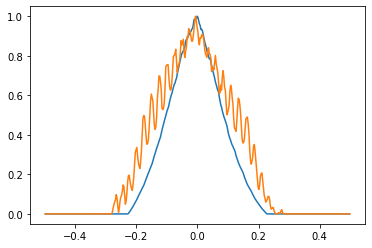

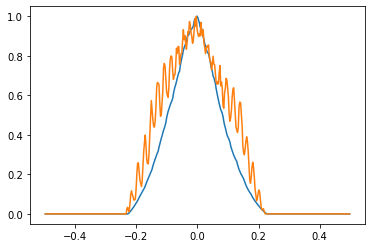

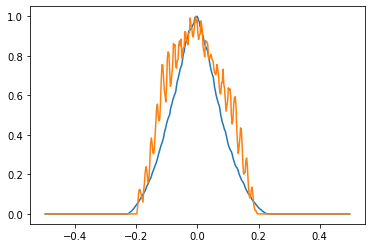

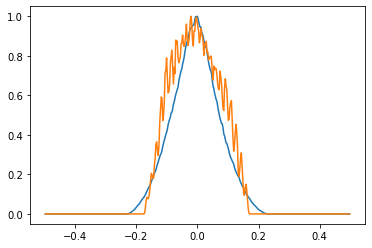

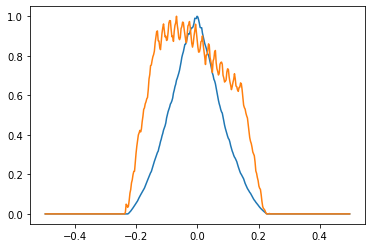

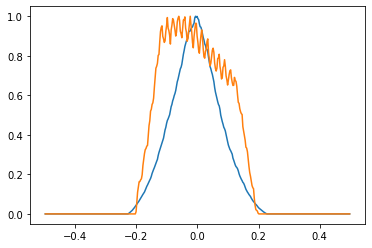

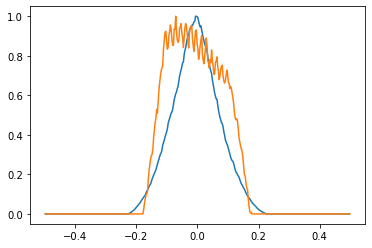

In [67]:
array = ["BOA_20211203_235615","BOA_20211204_113451","BOA_20211204_151501","BOA_20211204_160800","BOA_20211204_182217","BOA_20211205_005536","BOA_20211205_004451"]
for folder in array:
    titlebeforeX = folder+"/linear_monitor_divergence2.dat"
    titlebeforeY = folder+"/linear_monitor_divergence2Y.dat"
    titleafterX = folder+"/linear_monitor_divergence4.dat"
    titleafterY = folder+"/linear_monitor_divergence4Y.dat"

    contentbeforeX = np.loadtxt(titlebeforeX,dtype=float,unpack=True)
    contentbeforeY = np.loadtxt(titlebeforeY,dtype=float,unpack=True)
    contentafterX = np.loadtxt(titleafterX,dtype=float,unpack=True)
    contentafterY = np.loadtxt(titleafterY,dtype=float,unpack=True)
    
    triangle = build_triangle(252,contentbeforeX[0])
    plt.plot(contentbeforeX[0],contentbeforeX[1]*triangle/np.max(contentbeforeX[1]*triangle))
    plt.plot(contentafterX[0],contentafterX[1]/np.max(contentafterX[1]))
    plt.show()
    plt.close()

NUMBERS 0.008504828687232695 0.0036996004789462225
0.008477394159028479
0.016851596755701477
0.025119081522042848
0.03345920637061069
0.04191140363554342
0.05024342479815376
0.05866604178506052
0.06701725865533081
0.07519494304564674
0.08361325761278593
0.09196940128889461
0.10029319369692716
0.10879802238415985
0.11711211323303364
0.12545792841702683
0.13384626876180772
0.14223665262871182
0.15068378911599595
0.15894676288601828
0.16728431156416268
0.1756618560897609
0.18409929858684465
0.19244456766487975
0.2006790682012074
0.20905003010221476
0.217389576527118
0.22561704564139579
0.23392861699351306
0.24230144445883564
0.2506662157717581
0.25906303010162735
0.2673516881312246
0.2756693568061481
0.2841306205453775
0.29259483569206485
0.30095203950865484
0.30935818396071435
0.3176703698262125
0.32599898582106335
0.3343780421120505
0.34276828885549004
0.35113010382305093
0.35955036391799433
0.36794177690761376
0.37625164892882
0.3845771966587279
0.39297528682880534
0.4013213169020109
0

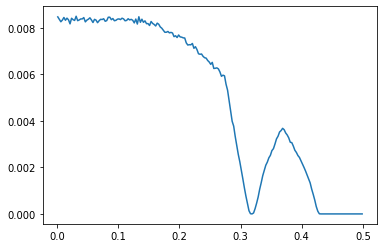

0.30125 0.0018837282510274604
0.30375 0.001505410561024304
0.30625 0.001121226766488662
0.30875 0.0007655980836966212
0.31125 0.00045082774316716246
0.31375 0.00013810917860404987
0.31625 8.210696277577877e-06
0.36875 0.0036821326196819536
0.37125 0.0036230440379400536
0.37375 0.003482895578011621
0.37625 0.0033962191617439227
0.37875 0.0032716681151292977
0.38125 0.00308339986329166
0.38375 0.003067221376866067
0.38625 0.002918208193725239
0.38875 0.00273917186931242
0.39125 0.002644339163138239
0.39375 0.002511884994558407
0.39625 0.0024297120723629543
0.39875 0.0022866546422682776
0.40125 0.002145489948363569
0.40375 0.0019980195770574406
0.40625 0.001843822949576256
0.40875 0.001669712531642481
0.41125 0.0014970058234882325
0.41375 0.001334810763149263
0.41625 0.0010655953523101974
0.41875 0.0008419589503312026
0.42125 0.0005984891294514924
0.42375 0.00031585750253508994
0.42625 0.00011687591605921407
0.42875 5.830741012252183e-06
NUMBERS 0.009806507274633974 0.004265830664465778
0

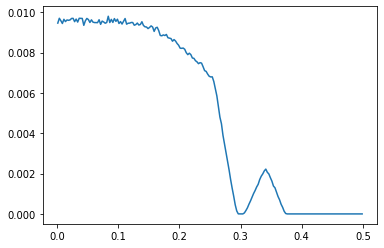

0.34125 0.0022232880943960703
0.34375 0.0020650734361802653
0.34625 0.0019822837692754776
0.34875 0.0017954140619868646
0.35125 0.0016245798190775349
0.35375 0.0013834438433385618
0.35625 0.001295779153425883
0.35875 0.0010745695280513679
0.36125 0.0008633169502384395
0.36375 0.0007006529529853323
0.36625 0.0004803644768395491
0.36875 0.0003272492230538997
0.37125 0.0001335053696864485
0.37375 2.048750697040802e-05
NUMBERS 0.010788927893155158 0.004693183633522493
0.010561593653243738
0.02107380900396181
0.03176232543307282
0.0420690505919008
0.052609806283587295
0.06328995758948058
0.07381006005537884
0.08437225728376861
0.09483195161658543
0.10537661928599083
0.115977948334572
0.12647818747505413
0.13724344142161254
0.14763336981990743
0.15811949281776239
0.16853259558483702
0.17917896085313498
0.189681279297439
0.20029946905250093
0.21092045847923835
0.22113941010164412
0.23191905520676373
0.2426095119394337
0.25313214010244184
0.263786528940062
0.2741588007971988
0.2847194569996246

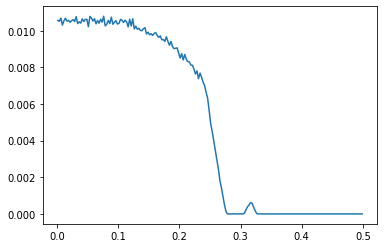

0.31625 0.0006142108623921881
0.31875 0.0005805244882394747
0.32125 0.0003865632061608014
0.32375 0.0001792231659512309
0.32625 2.6530242974322928e-05


In [112]:
array = ["BOA_20211204_182217","BOA_20211205_005536","BOA_20211205_004451"]
for folder in array:
    titleafterY = folder+"/linear_monitor_divergence4Y.dat"
    content4Y = np.loadtxt(titleafterY,dtype=float,unpack=True)
    contentfullY = []
    for i in range(int(len(content4Y[0])/2)):
        contentfullY.append(content4Y[1][i]+content4Y[1][-i])
    contentfullreverseY = contentfullY[::-1]/np.sum(contentfullY)
    plot_Y = content4Y[0][int(len(content4Y[0])/2):] 
    print("NUMBERS",np.max(contentfullreverseY),np.max(contentfullreverseY)*0.435)
    sumSiem,j = 0,0
    j=0
    while j<len(contentfullreverseY)-1:
        sumSiem += contentfullreverseY[j]
        if contentfullreverseY[j] == 0:
            sumSiem = 0
        j+=1
        print(sumSiem)
    integral_vertical = plot_Y[j]
    value_vertical = plot_Y[j]
    plt.plot(plot_Y,contentfullreverseY)
    plt.show()
    plt.close()
    j=120
    while j<len(contentfullreverseY)-1:
        if contentfullreverseY[j] > contentfullreverseY[j+1]:
            print(plot_Y[j],contentfullreverseY[j])
        j+=1

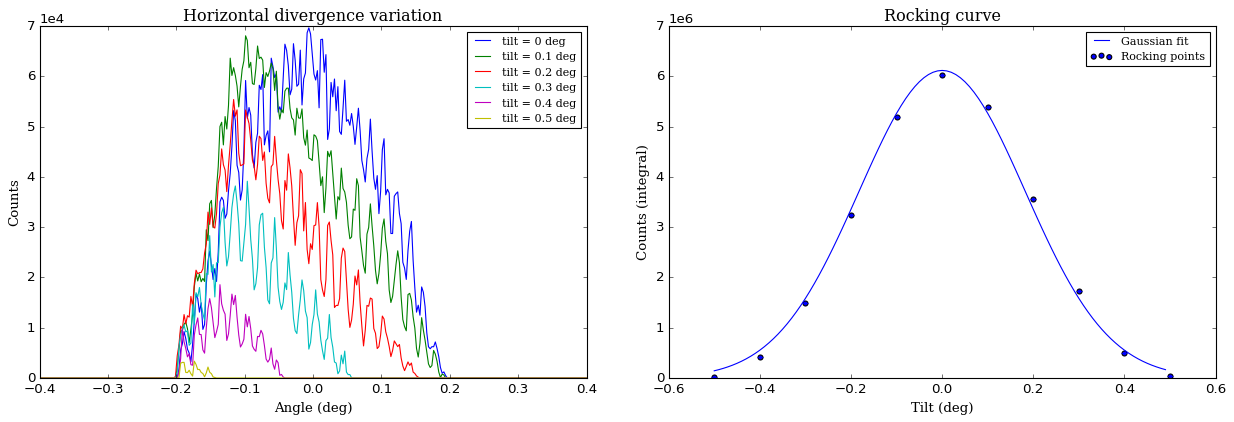

In [47]:

array = ["BOA_20211213_162717","BOA_20211213_153236","BOA_20211213_143755","BOA_20211213_134144","BOA_20211213_115433","BOA_20211213_105646","BOA_20211211_163024","BOA_20211211_192331","BOA_20211212_193722","BOA_20211212_203401","BOA_20211212_213540"]
#array = ["BOA_20211213_105646","BOA_20211211_163024","BOA_20211211_192331","BOA_20211212_193722","BOA_20211212_203401","BOA_20211212_213540","BOA_20211213_092507"]
tilt = [-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5]
#tilt = [0,0.1,0.2,0.3,0.4,0.5,0.6]
i=0
rocking = []
median = []

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.subplots_adjust(left=0.01, bottom=0.06, right=0.99, top=0.5, wspace=0.15)
plt.rcParams["font.family"] = "serif"
plt.style.use('classic')
font = font_manager.FontProperties(family='serif', size=10)
fig.patch.set_facecolor('white')
for folder in array:
    titleafterX = folder+"/linear_monitor_divergence4.dat"
    #titleafterY = folder+"/linear_monitor_divergence4Y.dat"

    contentafterX = np.loadtxt(titleafterX,dtype=float,unpack=True)
    #contentafterY = np.loadtxt(titleafterY,dtype=float,unpack=True)
    
    rocking.append(np.sum(contentafterX[1]))
    
    medianloc,j = 0,0
    while medianloc < 0.5: 
        medianloc += contentafterX[1][j]/np.sum(contentafterX[1])
        j+=1
    median.append(contentafterX[0][j])
    if i>4:
        axs[0].plot(contentafterX[0],contentafterX[1],label="tilt = "+str(tilt[i])+" deg")
        #plt.plot(contentafterY[0],contentafterY[1]/np.max(contentafterY[1]),label="vertical")
    i+=1
axs[0].set_xlabel("Angle (deg)",fontname="serif")
axs[0].set_ylabel("Counts",fontname="serif")
axs[0].set_title("Horizontal divergence variation",fontname="serif")
axs[0].legend(prop=font)
axs[0].ticklabel_format(axis="y",style="sci",scilimits=(0,0))
axs[0].set_xlim(-0.4,0.4)

def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y
parameters, covariance = curve_fit(Gauss, tilt, rocking)
 
fit_A = parameters[0]
fit_B = parameters[1]
 
fit_y = Gauss(np.array([i/100 - 0.5 for i in range(100)]), fit_A, fit_B)
axs[1].scatter(tilt[:i],rocking,label="Rocking points")
axs[1].errorbar(tilt,rocking,yerr=[np.sqrt(rocking[i]) for i in range(len(rocking))],marker="None",fmt="o",color="blue")
axs[1].plot([i/100 - 0.5 for i in range(100)],fit_y,label="Gaussian fit")
axs[1].set_xlabel("Tilt (deg)",fontname="serif")
axs[1].set_ylabel("Counts (integral)",fontname="serif")
axs[1].set_title("Rocking curve",fontname="serif")
axs[1].set_ylim(0,7000000)
axs[1].ticklabel_format(axis="y",style="sci",scilimits=(0,0))
axs[1].legend(prop=font)

file_path = "/Users/oriolsansplanell/Dropbox/Aplicaciones/Overleaf/Thesis/Figures/Simulation/"
file_name = "tilt-spectra-and-rocking"
plt.savefig(file_path+file_name+".pdf", bbox_inches='tight')
plt.show()
plt.close()

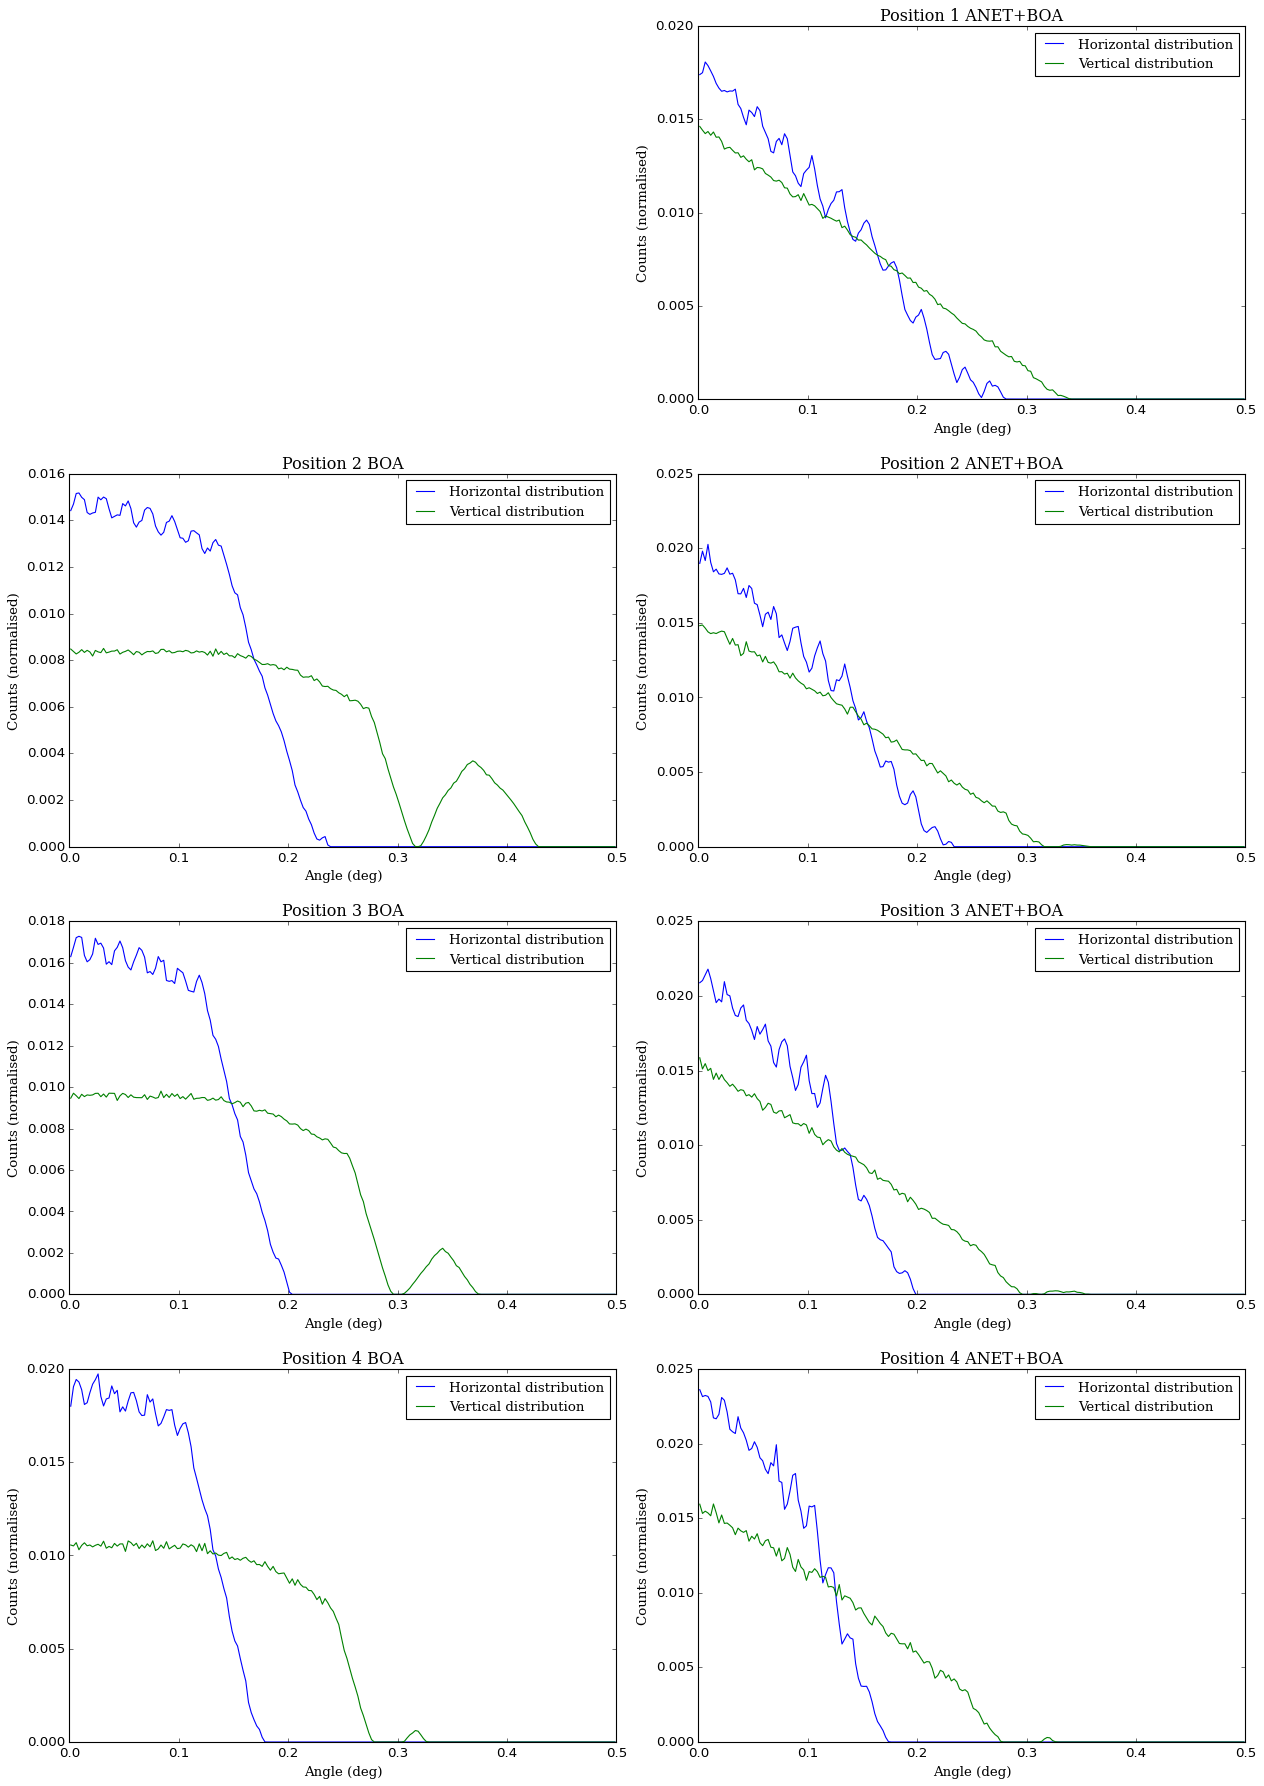

In [60]:
def calculate_fullplot (folder,percentage,integral,name,file):
    title4X = folder+"/linear_monitor_divergence4.dat"
    title4Y = folder+"/linear_monitor_divergence4Y.dat"

    content4X = np.loadtxt(title4X,dtype=float,unpack=True)
    content4Y = np.loadtxt(title4Y,dtype=float,unpack=True)
    
    contentfullX = []
    for i in range(int(len(content4X[0])/2)):
        contentfullX.append(content4X[1][i]+content4X[1][-i])
    contentfullreverseX = contentfullX[::-1]/np.sum(contentfullX)
    
    plot_X = content4X[0][int(len(content4X[0])/2):]
    
    contentfullY = []
    for i in range(int(len(content4Y[0])/2)):
        contentfullY.append(content4Y[1][i]+content4Y[1][-i])
    contentfullreverseY = contentfullY[::-1]/np.sum(contentfullY)
    
    plot_Y = content4Y[0][int(len(content4Y[0])/2):]    

    return [plot_X,plot_Y,contentfullreverseX,contentfullreverseY]

array = ["BOA_20211203_235615","BOA_20211204_113451","BOA_20211204_151501","BOA_20211204_160800","BOA_20211204_182217","BOA_20211205_005536","BOA_20211205_004451"]
array_calc_percentage = np.zeros(14)
array_calc_integral = np.zeros(14)
std_array = np.zeros(14)
name = ["Position 1 ANET+BOA","Position 2 ANET+BOA","Position 3 ANET+BOA","Position 4 ANET+BOA","Position 2 BOA","Position 3 BOA","Position 4 BOA"]
file = ["Position_1_ANET+BOA","Position_2_ANET+BOA","Position_3_ANET+BOA","Position_4_ANET+BOA","Position_2_BOA","Position_3_BOA","Position_4_BOA"]
positions = [(0,1),(1,1),(2,1),(3,1),(1,0),(2,0),(3,0)]
i=0

fig, axs = plt.subplots(4, 2, figsize=(15, 55))
fig.subplots_adjust(left=0.01, bottom=0.06, right=0.99, top=0.45, wspace=0.15)
plt.rcParams["font.family"] = "serif"
plt.style.use('classic')
font = font_manager.FontProperties(family='serif', size=12)
fig.patch.set_facecolor('white')

for boa in array:
    elem = calculate_fullplot(boa,0.435,0.87,name[i],file[i])
    axs[positions[i]].plot(elem[0],elem[2],label="Horizontal distribution")
    axs[positions[i]].plot(elem[1],elem[3],label="Vertical distribution")
    axs[positions[i]].set_title(str(name[i]),fontname="serif")
    axs[positions[i]].legend(prop=font)
    axs[positions[i]].set_xlabel("Angle (deg)",fontname="serif")
    axs[positions[i]].set_ylabel("Counts (normalised)",fontname="serif")
    i+=1
axs[0,0].axis("off")
file_path = "/Users/oriolsansplanell/Dropbox/Aplicaciones/Overleaf/Thesis/Figures/Acceptance/"
file_name = "All-simulations"
plt.savefig(file_path+file_name+".pdf", bbox_inches='tight')
plt.show()
plt.close()

In [50]:
print(name[2])

Position 3 ANET+BOA
